<a href="https://colab.research.google.com/github/springboardmentor140/Electricity-Demand-Forecasting/blob/main/Springboard_Soumita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA INTRODUCTION**


ARRANGING AND INTEGRATING DIFFERENT DATASETS

In [ ]:
import pandas as pd
import os
import numpy as np
#Reading the two datasets
path_energy="/content/drive/MyDrive/Datasets/energy_dataset (1).xlsx"
path_weather="/content/drive/MyDrive/Datasets/weather_features (1).xlsx"
df1 = pd.read_excel(path_energy)
df2 = pd.read_excel(path_weather)
#converting the coloumns containing date and time to a standard datetime format
df1['time'] = pd.to_datetime(df1['time'], utc=True, infer_datetime_format=True)
df2['dt_iso'] = pd.to_datetime(df2['dt_iso'], utc=True, infer_datetime_format=True)
df1['time'] = df1['time'].dt.tz_localize(None)
df2['dt_iso'] = df2['dt_iso'].dt.tz_localize(None)
#Dropping city name and aggregating the weather data of the 5 cities based on time
df2 = df2.drop(columns=['city_name'])
def most_frequent(series):
    return series.mode()[0]
df2.rename(columns={'dt_iso': 'time'}, inplace=True)
aggregated_data =df2.groupby('time').agg({
        'temp': 'mean',
        'temp_min': 'mean',
        'temp_max': 'mean',
        'pressure': 'mean',
        'humidity': 'mean',
        'wind_speed': 'mean',
        'wind_deg': 'mean',
        'rain_1h': 'mean',
        'rain_3h': 'mean',
        'snow_3h': 'mean',
        'clouds_all': 'mean',
        'weather_id': 'mean',
        'weather_main': most_frequent,
        'weather_description': most_frequent,
        'weather_icon': most_frequent
    }
).reset_index()




<ipython-input-1-6f8c9aaf19ec>:9: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df1['time'] = pd.to_datetime(df1['time'], utc=True, infer_datetime_format=True)
<ipython-input-1-6f8c9aaf19ec>:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df2['dt_iso'] = pd.to_datetime(df2['dt_iso'], utc=True, infer_datetime_format=True)
<ipython-input-1-6f8c9aaf19ec>:16: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  return series.mode()[0]
<ipython-input-1-6f8c9aaf19ec>:16: UserWarning: Unable to sort modes: '<' not supporte

In [ ]:
#Exporting final weather dataset to system
aggregated_data.to_excel("aggregateddsfinal.xlsx")

In [ ]:
#Reading the dataset and merging it with the energy dataset to get the final dataset.
df3=pd.read_excel("aggregateddsfinal.xlsx")
merged_df = pd.merge(df1,df3, on='time',how='left')
merged_df.shape


MISSING VALUE PERCENTAGE FOR EACH COLOUMN

In [ ]:


# Calculate the percentage of missing values in each column
missing_values_percent = merged_df.isnull().mean() * 100

# Display the percentage of missing values for each column
print(missing_values_percent)


time                                             0.000000
generation biomass                               0.054187
generation fossil brown coal/lignite             0.051335
generation fossil coal-derived gas               0.051335
generation fossil gas                            0.051335
generation fossil hard coal                      0.051335
generation fossil oil                            0.054187
generation fossil oil shale                      0.051335
generation fossil peat                           0.051335
generation geothermal                            0.051335
generation hydro pumped storage aggregated     100.000000
generation hydro pumped storage consumption      0.054187
generation hydro run-of-river and poundage       0.054187
generation hydro water reservoir                 0.051335
generation marine                                0.054187
generation nuclear                               0.048483
generation other                                 0.051335
generation oth

**DATA PREPROCESSING**

DROPPING COLUMNS WITH ALL VALUES NULL

In [ ]:
merged_df=merged_df.dropna(axis=1, how='all')

DROPPING COLUMNS THAT ARE UNNAMED

In [ ]:
# Drop unnamed columns
merged_df = merged_df.loc[:, ~merged_df.columns.str.contains('^Unnamed')]



DIMENSION OF MERGED DATASET

In [ ]:
merged_df.shape


(35064, 42)

PRINTING ALL COLOUMS WITH ALL VALUES 0 AND THEN REMOVING THEM AS THEY HAVE NO IMPACT ON THE TARGET VARIABLE

In [ ]:

def remove_zero_columns(df):

  """Deletes columns from a DataFrame that contain only zeros.

  Args:
      df (pandas.DataFrame): The DataFrame to process.

  Returns:
      pandas.DataFrame: The DataFrame with zero columns removed."""

  zero_cols = [col for col in df.columns if df[col].all() == df[col].iloc[0] and df[col].dropna().sum() == 0]
  for col in zero_cols:
      print(f"Column {col} contains only zeros and has been deleted")
      del df[col]
  return df


merged_df = remove_zero_columns(merged_df)

merged_df.shape


Column generation fossil coal-derived gas contains only zeros and has been deleted
Column generation fossil oil shale contains only zeros and has been deleted
Column generation fossil peat contains only zeros and has been deleted
Column generation geothermal contains only zeros and has been deleted
Column generation marine contains only zeros and has been deleted
Column generation wind offshore contains only zeros and has been deleted


<ipython-input-8-d5dc40f78cc4>:11: FutureWarning: 'all' with datetime64 dtypes is deprecated and will raise in a future version. Use (obj != pd.Timestamp(0)).all() instead.
  zero_cols = [col for col in df.columns if df[col].all() == df[col].iloc[0] and df[col].dropna().sum() == 0]


(35064, 36)

CONCISE SUMMARY OF DATA AFTER BASIC PREPROCESSING WITH INFO() FUNCTION

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   time                                         35064 non-null  datetime64[ns]
 1   generation biomass                           35045 non-null  float64       
 2   generation fossil brown coal/lignite         35046 non-null  float64       
 3   generation fossil gas                        35046 non-null  float64       
 4   generation fossil hard coal                  35046 non-null  float64       
 5   generation fossil oil                        35045 non-null  float64       
 6   generation hydro pumped storage consumption  35045 non-null  float64       
 7   generation hydro run-of-river and poundage   35045 non-null  float64       
 8   generation hydro water reservoir             35046 non-null  float64       


DESCRIPTIVE STATISTICS OD MERGED DATASET

In [ ]:
print(merged_df.describe())

                      time  generation biomass  \
count                35064        35045.000000   
mean   2016-12-31 10:30:00          383.513540   
min    2014-12-31 23:00:00            0.000000   
25%    2016-01-01 04:45:00          333.000000   
50%    2016-12-31 10:30:00          367.000000   
75%    2017-12-31 16:15:00          433.000000   
max    2018-12-31 22:00:00          592.000000   
std                    NaN           85.353943   

       generation fossil brown coal/lignite  generation fossil gas  \
count                          35046.000000           35046.000000   
mean                             448.059208            5622.737488   
min                                0.000000               0.000000   
25%                                0.000000            4126.000000   
50%                              509.000000            4969.000000   
75%                              757.000000            6429.000000   
max                              999.000000           20034

MISSING VALUE IMPUTATION WITH FORWARD FILL FOLLOWED BY BACKWARD FILL

In [ ]:
def impute_and_ffillbfill(df):
  """
  Imputes missing values and performs forward fill (ffill) in a DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame to process.

  Returns:
      pandas.DataFrame: The DataFrame with missing values imputed and forward filled.
  """
  # Impute missing values (can be customized based on data type and needs)
  df = df.fillna(method='ffill')  # Forward fill all missing values
  df = df.fillna(method='bfill')  # Backward fill all missing values remaining after the forward fill as forward fill can still leave empty rows due to missing values in the very beginning, all missing values in a row or gaps between missing value clusters


  return df


merged_df = impute_and_ffillbfill(merged_df)

OUTLIER DETECTION WITH IQR METHOD

In [ ]:
                                              #OUTLIER DETECTION

#The Interquartile Range (IQR) is a robust statistical measure of variability used to identify outliers in a dataset.
###The IQR method uses thresholds to define outlier boundaries:
###Lower whisker: Q1 - 1.5 * IQR
###Upper whisker: Q3 + 1.5 * IQR
###Data points below the lower whisker or above the upper whisker are considered potential outliers.


Q1 = merged_df['price actual'].quantile(0.25)
Q3 = merged_df['price actual'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = merged_df[(merged_df['price actual'] < lower_bound) | (merged_df['price actual'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 699


VISUALIZATION OF OUTLIER

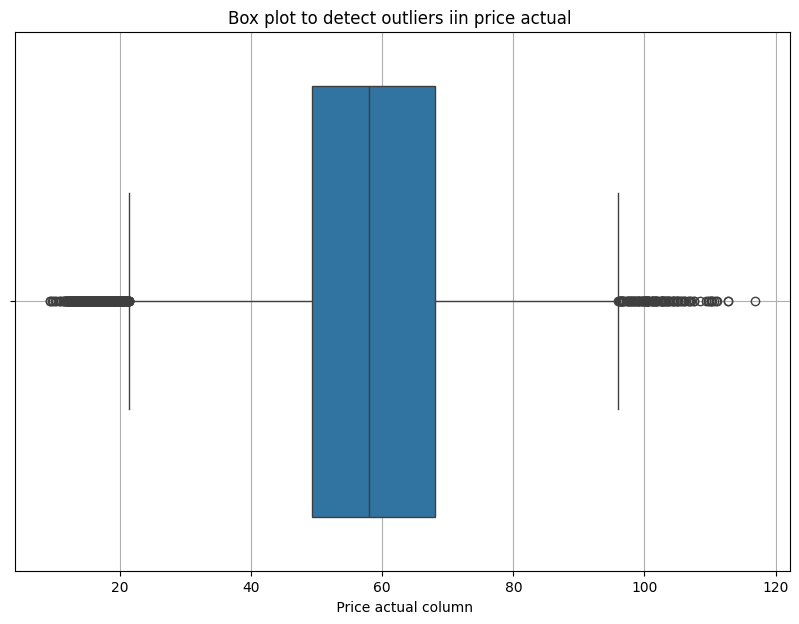

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.boxplot(x=merged_df['price actual'])
plt.title("Box plot to detect outliers iin price actual ")
plt.xlabel(" Price actual column")
plt.grid(True)
plt.show()

**FEATURE ENGINEERING AND VISUALIZATION**

GENERATING PEAK AND NON PEAK HOURS AND VISUALIZATION

In [ ]:

def find_peak_non_peak(df, datetime_col, demand_col, price_col, peak_threshold=0.8):
  """
  Identifies peak and non-peak hours based on electricity demand and price.

  Args:
      df (pandas.DataFrame): The DataFrame containing datetime, demand, and price data.
      datetime_col (str): The name of the datetime column.
      demand_col (str): The name of the demand column.
      price_col (str): The name of the price column.
      peak_threshold (float, optional): The threshold for peak demand (proportion of max demand). Defaults to 0.8.

  Returns:
      pandas.DataFrame: A new DataFrame with additional columns for peak/non-peak hours.
  """
  df['hour'] = pd.to_datetime(df[datetime_col]).dt.hour

  # Calculate daily maximum demand and apply threshold
  df['max_demand_daily'] = df.groupby(df['hour'])[demand_col].transform(max)
  df['peak_hour'] = df[demand_col] >= df['max_demand_daily'] * peak_threshold

  # Optional: Analyze price during peak hours (replace with your desired logic)
  df['peak_price'] = df[price_col] * df['peak_hour']  # Price during peak hours


  return df

merged_df= find_peak_non_peak(merged_df.copy(), 'time', 'total load actual', 'price actual')



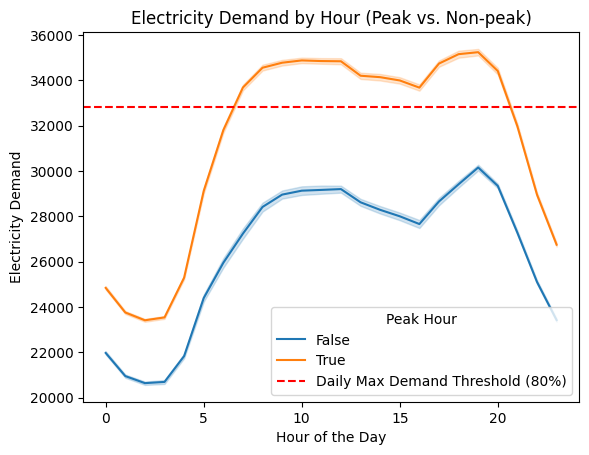

In [ ]:


sns.lineplot(x='hour', y='total load actual', hue='peak_hour', data=merged_df)
plt.axhline(y=merged_df['max_demand_daily'].max() * 0.8, color='red', linestyle='--', label='Daily Max Demand Threshold (80%)')  # Adjust threshold as needed
plt.xlabel('Hour of the Day')
plt.ylabel('Electricity Demand')
plt.title('Electricity Demand by Hour (Peak vs. Non-peak)')
plt.legend(title='Peak Hour')
plt.show()




GENERATING DEMANDS BASED ON EACH DAY OF WEEK AND VISUALIZATION- MAXIMUM DEMAND SEEN ON WEDNESDAY AND TUESDAY

<ipython-input-46-cda005863296>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=merged_df['day_of_week_name'], y=merged_df['day_of_week_demand'], palette='Set2')  # Set a categorical color palette


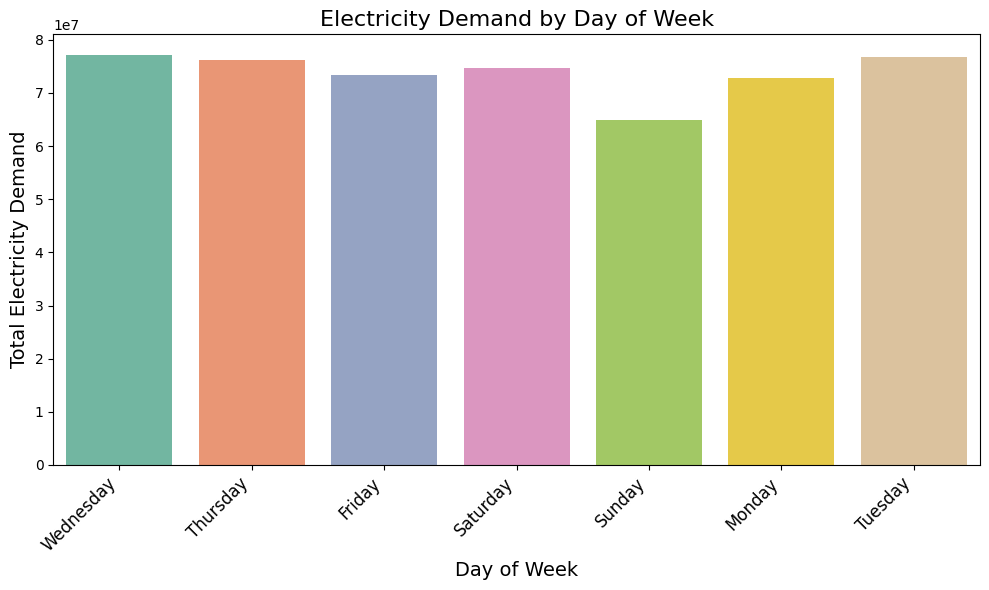

In [ ]:


def add_day_of_week_demand(df, datetime_col, demand_col):
  """
  Calculates electricity demand for each day of the week and adds it as a new column to the DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame containing datetime and demand data.
      datetime_col (str): The name of the datetime column.
      demand_col (str): The name of the demand column.

  Returns:
      pandas.DataFrame: The original DataFrame with a new column for day-of-week demand.
  """
  df['day_of_week'] = pd.to_datetime(df[datetime_col]).dt.dayofweek
  day_of_week_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
  df['day_of_week_name'] = df['day_of_week'].apply(lambda x: day_of_week_names[x])
  daily_demand = df.groupby('day_of_week_name')[demand_col].sum()
  df['day_of_week_demand'] = df['day_of_week_name'].apply(lambda x: daily_demand.get(x))

  return df



merged_df= add_day_of_week_demand(merged_df.copy(), 'time', 'total load actual')


# Data Visualization (Day of Week Demand)


plt.figure(figsize=(10, 6))

# Create bar chart with clear labels
sns.barplot(x=merged_df['day_of_week_name'], y=merged_df['day_of_week_demand'], palette='Set2')  # Set a categorical color palette

# Customize x-axis labels for readability and prevent overlapping
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Total Electricity Demand', fontsize=14)
plt.title('Electricity Demand by Day of Week', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()



GENERATING DEMAND ON WEEKDAYS AND WEEKENDS AND VISUALIZATION- MORE DEMAND SEEN ON WEEKDAYS

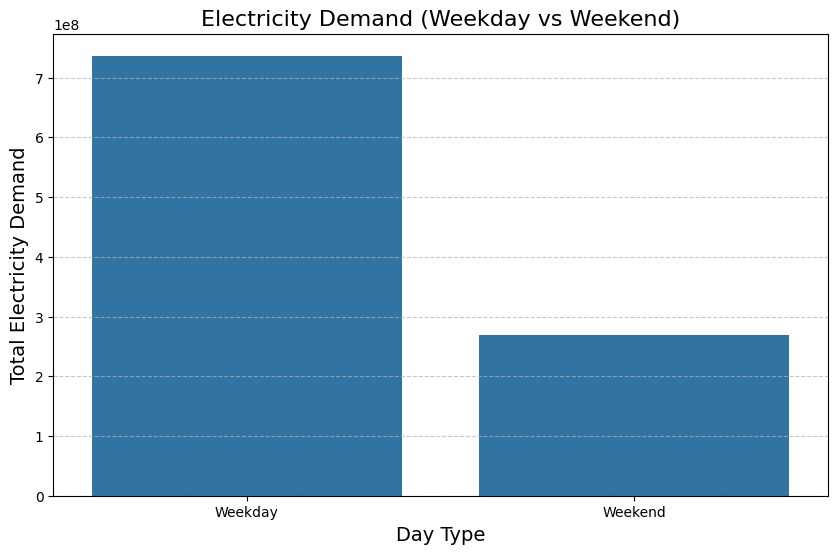

In [ ]:

def add_day_type_demand(df, datetime_col, demand_col):
  """
  Calculates electricity demand for weekdays and weekends and adds it as a new column to the DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame containing datetime and demand data.
      datetime_col (str): The name of the datetime column.
      demand_col (str): The name of the demand column.

  Returns:
      pandas.DataFrame: The original DataFrame with a new column for weekday/weekend demand.
  """
  df['day_of_week'] = pd.to_datetime(df[datetime_col]).dt.dayofweek
  is_weekend = df['day_of_week'].isin([5, 6])  # Weekends are Saturday (5) and Sunday (6)
  df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekend' if x in [5, 6] else 'Weekday')
  daily_demand = df.groupby('day_type')[demand_col].sum()
  df['day_type_demand'] = df['day_type'].apply(lambda x: daily_demand.get(x))

  return df


merged_df= add_day_type_demand(merged_df.copy(), 'time', 'total load actual')


# Data Visualization (Weekday vs Weekend Demand)


plt.figure(figsize=(10, 6))

# Create a bar chart with clear labels
sns.barplot(x='day_type', y='day_type_demand', data=merged_df)

# Customize labels, title, and gridlines
plt.xlabel('Day Type', fontsize=14)
plt.ylabel('Total Electricity Demand', fontsize=14)
plt.title('Electricity Demand (Weekday vs Weekend)', fontsize=16)
plt.xticks(rotation=0)  # No rotation for horizontal bar chart
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add vertical gridlines with dashed style

# Display the plot
plt.show()



**EXPLORATORY DATA ANALYSIS**

CORRELATION MATRIX TO UNDERSTAND RELATIONSHIP BETWEEN WEATHER VARIABLES

Correlation Matrix:
                       temp  humidity  wind_speed  wind_deg  total load actual  price actual
temp               1.000000 -0.674630    0.100628 -0.115236           0.203489      0.080356
humidity          -0.674630  1.000000   -0.341188  0.020164          -0.366059     -0.039439
wind_speed         0.100628 -0.341188    1.000000  0.361267           0.194858     -0.225336
wind_deg          -0.115236  0.020164    0.361267  1.000000          -0.085287     -0.203741
total load actual  0.203489 -0.366059    0.194858 -0.085287           1.000000      0.435573
price actual       0.080356 -0.039439   -0.225336 -0.203741           0.435573      1.000000


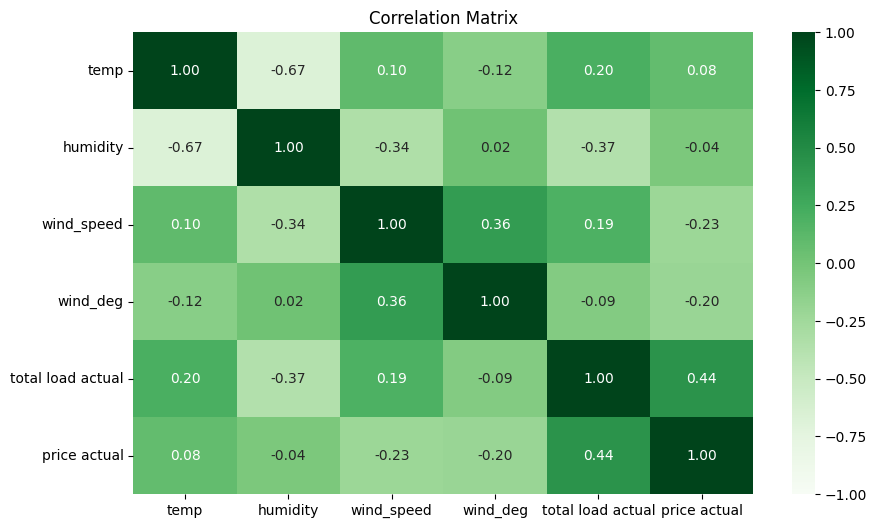

In [ ]:

import seaborn as sns  # Import seaborn for better heatmap visualization
import pandas as pd

# Specify the columns you want to include
columns_to_visualize = ['temp', 'humidity', 'pressure', 'wind_speed','wind_deg','snow_3h', 'rain_1h','rain_3h','clouds_all', 'total load actual', 'price actual']

def print_correlation_matrix(df, columns):
  """
  Prints the correlation matrix for a subset of columns in a DataFrame.

  Args:
      df (pandas.DataFrame): The DataFrame containing the columns.
      columns (list): A list of column names to include in the correlation matrix.
  """

  # Create a correlation matrix for the specified columns
  correlation_matrix = df[columns].corr()

  # Print the correlation matrix with clear formatting
  print("Correlation Matrix:")
  print(correlation_matrix.to_string())
# Specify the columns you want to include
columns_to_visualize = ['temp', 'humidity', 'wind_speed','wind_deg', 'total load actual', 'price actual']

# Apply the function to your DataFrame
print_correlation_matrix(merged_df.copy(), columns_to_visualize)

def visualize_correlation_matrix(df, columns):
  """
  Visualizes the correlation matrix for a subset of columns in a DataFrame with all values printed.

  Args:
      df (pandas.DataFrame): The DataFrame containing the columns.
      columns (list): A list of column names to include in the correlation matrix.
  """

  # Create a correlation matrix for the specified columns
  correlation_matrix = df[columns].corr()

  # Create a heatmap using seaborn with all annotations
  plt.figure(figsize=(10, 6))
  sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f',cbar='True',vmin=-1, vmax=1)  # Set value range for colormap
  plt.title('Correlation Matrix')
  plt.show()


# Apply the function to your DataFrame
visualize_correlation_matrix(merged_df.copy(), columns_to_visualize)


CORRELATION MATRIX TO UNDERSTAND RELATIONSHIP BETWEEN ENERGY VARIABLES

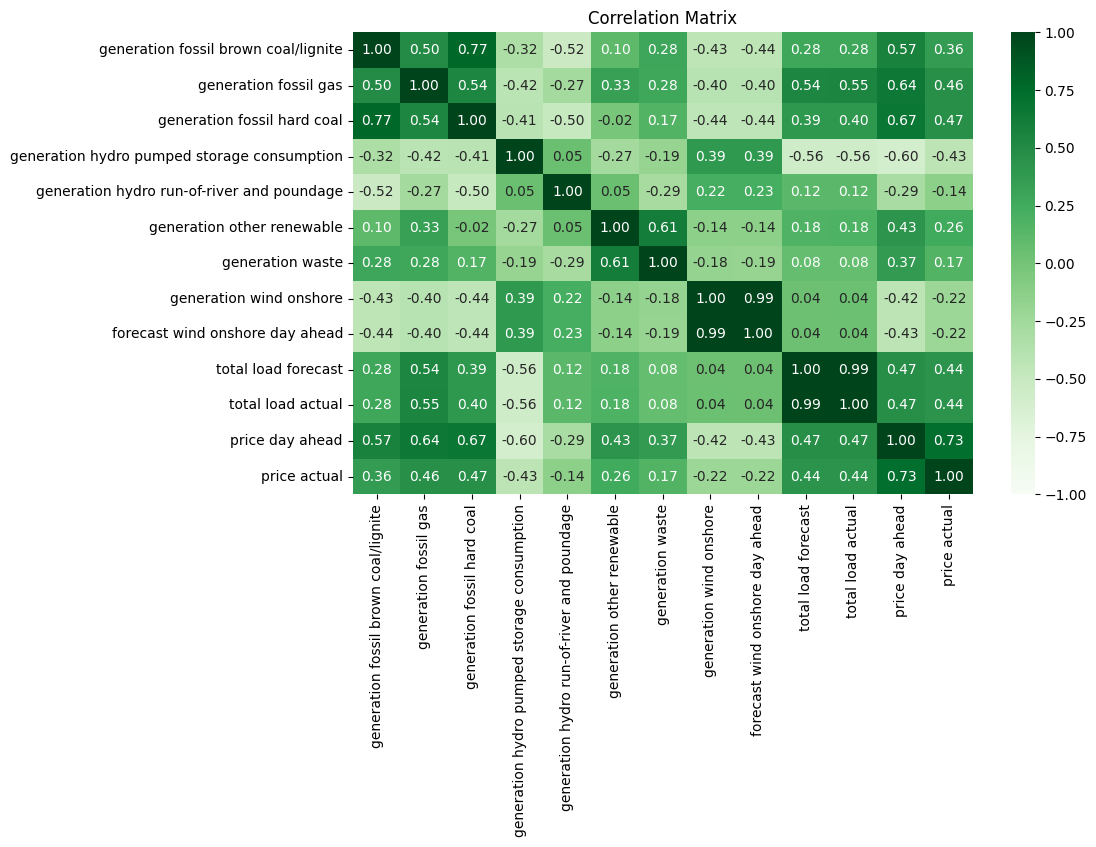

In [ ]:
import seaborn as sns  # Import seaborn for better heatmap visualization
import pandas as pd

# Specify the columns you want to include
columns_to_visualize = ['generation fossil brown coal/lignite' ,'generation fossil gas', 'generation fossil hard coal','generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage','generation other renewable','generation waste' ,'generation wind onshore','forecast wind onshore day ahead' ,'total load forecast' ,'total load actual','price day ahead','price actual']

def visualize_correlation_matrix(df, columns):
  """
  Visualizes the correlation matrix for a subset of columns in a DataFrame with all values printed.

  Args:
      df (pandas.DataFrame): The DataFrame containing the columns.
      columns (list): A list of column names to include in the correlation matrix.
  """

  # Create a correlation matrix for the specified columns
  correlation_matrix = df[columns].corr()

  # Create a heatmap using seaborn with all annotations
  plt.figure(figsize=(10, 6))
  sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f',cbar='True',vmin=-1, vmax=1)  # Set value range for colormap
  plt.title('Correlation Matrix')
  plt.show()


# Apply the function to your DataFrame
visualize_correlation_matrix(merged_df.copy(), columns_to_visualize)


GENERATING SEASONAL DEMANDS

In [ ]:
import pandas as pd

def create_seasons_column_spain(df, datetime_column_name):
  """
  Extracts a new column named "seasons" based on month for cities in Spain.

  Args:
      df (pandas.DataFrame): The DataFrame containing the datetime column.
      datetime_column_name (str): The name of the column containing datetime data.

  Returns:
      pandas.DataFrame: The modified DataFrame with a new "seasons" column.
  """

  # Extract month as an integer (1-12)
  df['month'] = df[datetime_column_name].dt.month

  # Define season mapping
  season_mapping = {
      1: 'Winter',
      2: 'Winter',
      3: 'Spring',
      4: 'Spring',
      5: 'Spring',
      6: 'Summer',
      7: 'Summer',
      8: 'Summer',
      9: 'Autumn',
      10: 'Autumn',
      11: 'Autumn',
      12: 'Winter'
  }

  # Create the "seasons" column based on month and mapping
  df['seasons'] = df['month'].map(season_mapping)



  return df

# Apply the function to your DataFrame
merged_df = create_seasons_column_spain(merged_df.copy(), 'time')



VISUALIZE SEASONAL DEMANDS- HIGHEST DEMANDS SEEN IN SUMMER AND WINTER

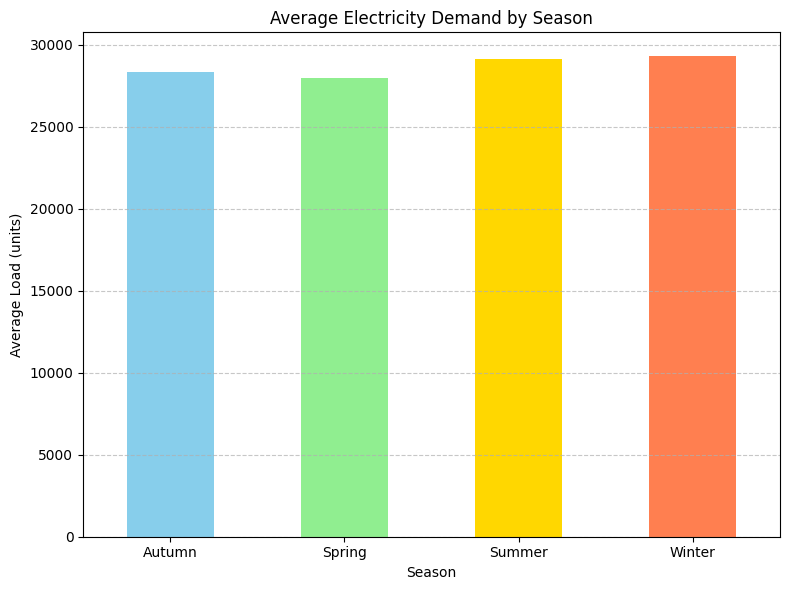

In [ ]:


# Group data by seasons (
seasonal_demand = merged_df.groupby('seasons')['total load actual'].mean()

# Create a bar chart
plt.figure(figsize=(8, 6))
seasonal_demand.plot(kind='bar', color=['skyblue', 'lightgreen', 'gold', 'coral'])
plt.title('Average Electricity Demand by Season')
plt.xlabel('Season')
plt.ylabel('Average Load (units)')
plt.xticks(rotation=0)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better visualization
plt.tight_layout()
plt.show()




GENERATING MONTHLY DEMAND

In [ ]:
import pandas as pd

# ... (rest of your code)

def add_monthly_demand_price(df, datetime_column_name, demand_column_name, price_column_name):
  """
  Adds separate columns for monthly average demand and price (month names as strings) to a DataFrame (custom calculation).

  Args:
      df (pandas.DataFrame): The DataFrame containing the data.
      datetime_column_name (str): The name of the column containing datetime data.
      demand_column_name (str): The name of the column containing electricity demand data.
      price_column_name (str): The name of the column containing electricity price data.

  Returns:
      pandas.DataFrame: The DataFrame with added monthly columns (month names as strings).
  """

  # Extract month names as strings
  df['month_name'] = df[datetime_column_name].dt.month_name()

  # Calculate monthly average demand and price using loops or vectorized operations (consider efficiency for large datasets)
  for month in df['month_name'].unique():
    df[f'demand_{month}'] = df[df['month_name'] == month][demand_column_name].mean()
    df[f'price_{month}'] = df[df['month_name'] == month][price_column_name].mean()

  # Drop the temporary 'month_name' column (optional)
  # df.drop('month_name', axis=1, inplace=True)

  return df

# Apply the function to your DataFrame
merged_df = add_monthly_demand_price(merged_df.copy(), 'time', 'total load actual', 'price actual')


VISUALIZATION OF MONTHLY DEMAND- HIGHEST DEMAND IN JULY AND HIGHEST PRICE IN DECEMBER

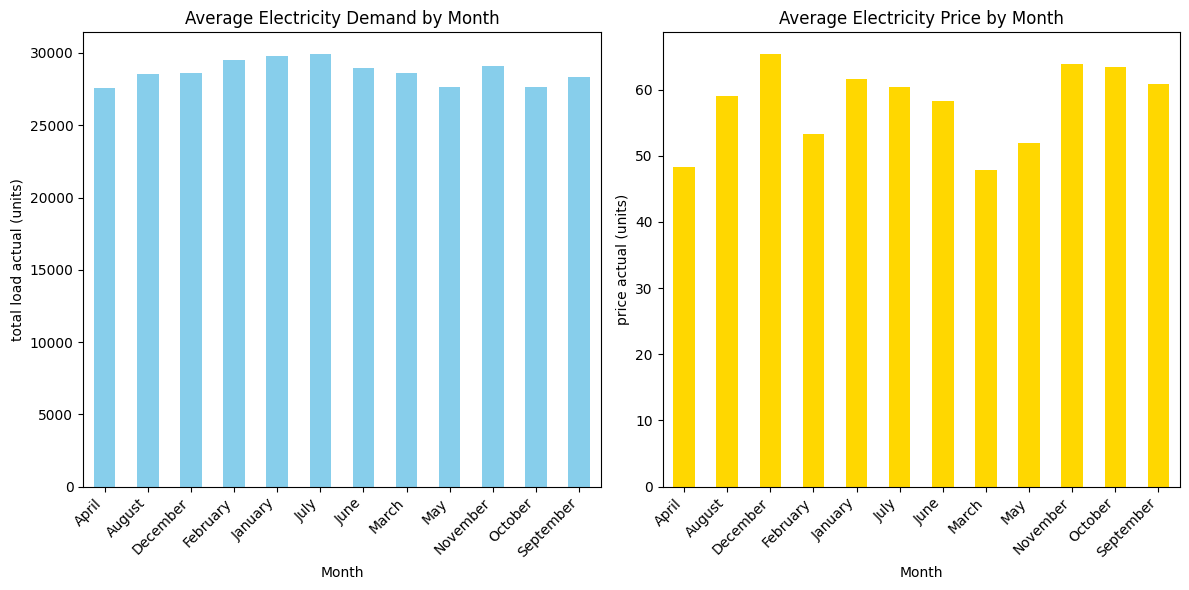

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

def visualize_monthly_demand_price(df, datetime_column_name, demand_column_name, price_column_name):
  """
  Visualizes electricity demand and price variations by month using bar charts.

  Args:
      df (pandas.DataFrame): The DataFrame containing the data.
      datetime_column_name (str): The name of the column containing datetime data.
      demand_column_name (str): The name of the column containing electricity demand data.
      price_column_name (str): The name of the column containing electricity price data.
  """

  # Extract month names as strings (January, February, etc.)
  df['month_name'] = df[datetime_column_name].dt.month_name()

  # Group data by month
  monthly_data = df.groupby('month_name')[
      [demand_column_name, price_column_name]].mean()

  # Create separate bar charts for demand and price
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

  # Bar chart for demand
  monthly_data[demand_column_name].plot(kind='bar', color='skyblue', ax=ax1)
  ax1.set_title('Average Electricity Demand by Month')
  ax1.set_xlabel('Month')
  ax1.set_ylabel(demand_column_name + ' (units)')
  ax1.set_xticks(range(len(monthly_data)))  # Set x-axis ticks for month positions
  ax1.set_xticklabels(monthly_data.index, rotation=45, ha='right')  # Rotate and align month labels

  # Bar chart for price
  monthly_data[price_column_name].plot(kind='bar', color='gold', ax=ax2)
  ax2.set_title('Average Electricity Price by Month')
  ax2.set_xlabel('Month')
  ax2.set_ylabel(price_column_name + ' (units)')
  ax2.set_xticks(range(len(monthly_data)))
  ax2.set_xticklabels(monthly_data.index, rotation=45, ha='right')

  plt.tight_layout()
  plt.show()

# Apply the function to your DataFrame
visualize_monthly_demand_price(merged_df.copy(), 'time', 'total load actual', 'price actual')


REMOVING OUTLIERS AND IMPUTING MISSING VALUES AFTER GENERATING NEW FEATURES

In [ ]:
import pandas as pd

def handle_outliers_and_impute(df, iqr_multiplier=1.5):
    """
    Detects outliers (optional), removes them, and imputes missing values
    using ffill and bfill for all columns in the DataFrame. Modifies the original DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame to process.
        iqr_multiplier (float): The multiplier for IQR outlier detection (optional).

    Returns:
        pandas.DataFrame: The modified DataFrame with outliers removed and missing values filled.
    """

    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:  # Process only numeric columns
            # Detect outliers using IQR method
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - iqr_multiplier * IQR
            upper_bound = Q3 + iqr_multiplier * IQR

            # Filter out outliers
            if iqr_multiplier > 0:
                df = df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

            # Impute missing values using ffill first, then bfill
            df[column] = df[column].fillna(method='ffill')
            df[column] = df[column].fillna(method='bfill')

    return df

# Example usage
# merged_df is your DataFrame containing features and the target variables
merged_df = handle_outliers_and_impute(merged_df.copy())  # Pass a copy to avoid modifying the original directly


<ipython-input-24-5cdaecf1709a>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(method='ffill')
<ipython-input-24-5cdaecf1709a>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(method='bfill')


ONE HOT ENCODING THE DATASET- ENCODING CATEGORICAL COLOUMNS. NEW DATASET IS encoded_df

In [ ]:
import pandas as pd

# Copy merged_df to avoid modifying the original data
df = merged_df.copy()

def identify_categorical_columns(df):
  """
  Identifies columns containing categorical data in a DataFrame.

  Args:
    df (pandas.DataFrame): The DataFrame to analyze.

  Returns:
    list: A list of column names containing categorical data.
  """

  categorical_cols = [col for col in df.columns if df[col].dtypes == 'object' or df[col].nunique() < 10]
  return categorical_cols

categorical_cols = identify_categorical_columns(df.copy())
print("Columns identified as potentially categorical:", categorical_cols)

encoded_df = pd.get_dummies(df, columns=categorical_cols)



print(encoded_df.head())  # Display the first few rows of the modified DataFrame



Columns identified as potentially categorical: ['rain_1h', 'rain_3h', 'snow_3h', 'weather_main', 'weather_description', 'weather_icon', 'peak_hour', 'day_of_week', 'day_of_week_name', 'day_of_week_demand', 'day_type', 'day_type_demand', 'seasons', 'month_name', 'demand_December', 'price_December', 'demand_January', 'price_January', 'demand_February', 'price_February', 'demand_March', 'price_March', 'demand_April', 'price_April', 'demand_May', 'price_May', 'demand_June', 'price_June', 'demand_July', 'price_July', 'demand_August', 'price_August', 'demand_September', 'price_September', 'demand_October', 'price_October', 'demand_November', 'price_November']
                  time  generation biomass  \
0  2014-12-31 23:00:00               447.0   
1  2015-01-01 00:00:00               449.0   
3  2015-01-01 02:00:00               438.0   
11 2015-01-01 10:00:00               421.0   
12 2015-01-01 11:00:00               428.0   

    generation fossil brown coal/lignite  generation fossil g

**FEATURE SELECTION**- SELECTING FEATURE SETS FOR TARGET VARIABLES 'total load actual' AND 'price actual'. WE ONLY SELECT FEATURES WITH CORRELATION COEFFICIENT GREATER THAN 0.1

In [ ]:
import pandas as pd

def select_features_by_correlation(df, target_variable, threshold=0.1 ):
    """
    Selects features from the dataframe that have an absolute correlation
    coefficient greater than the given threshold with the target variable.

    Parameters:
1    - df: DataFrame containing the features and target variable.
    - target_variable: The target variable column name as a string.
    - threshold: The absolute correlation threshold. Default is 0.1.

    Returns:
    - selected_features: List of feature names that meet the correlation criteria.
    """
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Get the correlations with the target variable
    target_corr = corr_matrix[target_variable].drop(target_variable)

    # Select features with absolute correlation greater than the threshold
    selected_features = target_corr[abs(target_corr) > threshold].index.tolist()

    return selected_features

# Example usage
# merged_df is your DataFrame containing features and the target variables

# Select features for 'total load actual'
selected_features_total_load = select_features_by_correlation(encoded_df, 'total load actual')

# Select features for 'price actual'
selected_features_price_actual = select_features_by_correlation(encoded_df, 'price actual')

print("Selected features for 'total load actual':", selected_features_total_load)
print("Selected features for 'price actual':", selected_features_price_actual)


Selected features for 'total load actual': ['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear', 'generation other', 'generation solar', 'generation wind onshore', 'forecast solar day ahead', 'forecast wind onshore day ahead', 'total load forecast', 'price day ahead', 'price actual', 'temp', 'temp_min', 'temp_max', 'humidity', 'wind_speed', 'hour', 'max_demand_daily', 'peak_price', 'month', 'weather_main_clear', 'weather_main_clouds', 'weather_description_few clouds', 'weather_icon_01d', 'weather_icon_01n', 'weather_icon_02d', 'peak_hour_False', 'peak_hour_True', 'day_of_week_5', 'day_of_week_6', 'day_of_week_name_Saturday', 'day_of_week_name_Sunday', 'day_of_week_demand_132181626.0', 'day_of_week_demand_137514935.0', 'day_type_Weekday', 'day_type_Weekend', 'day_type_dem

**DIVIDING THE DATASET INTO TRAINING, VALIDATION AND TEST DATASET** IN 60:20:20 RATIO WITH DIFFERENT FEATURE SETS FOR LOAD AND PRICE TARGET VARIABLES

In [ ]:
from sklearn.model_selection import train_test_split

def split_data(df, features_dict, target_col, test_size=0.2, val_size=0.2, random_state=42):
    """
    Splits a DataFrame into training, validation, and test sets for a given target variable.

    Args:
        df (pandas.DataFrame): The DataFrame to split.
        features_dict (dict): A dictionary where keys are target variables and values are lists of feature columns.
        target_col (str): The column name of the target variable.
        test_size (float, optional): Proportion of data for the test set. Defaults to 0.2.
        val_size (float, optional): Proportion of data for the validation set. Defaults to 0.2.
        random_state (int, optional): Random seed for splitting. Defaults to 42.

    Returns:
        tuple: A tuple containing the training, validation, and test DataFrames for features and the target.
    """

    # Feature matrix for the specific target variable
    X = df[features_dict[target_col]]

    # Extract target variable as a DataFrame
    y = df[target_col]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Further split training data into training and validation sets (optional)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size/(1-test_size), random_state=random_state)

    return X_train, X_val, X_test, y_train, y_val, y_test

# Define the feature sets for each target variable
features_dict = {
    'total load actual': ['generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear', 'generation other', 'generation solar', 'generation wind onshore', 'forecast solar day ahead', 'forecast wind onshore day ahead','price day ahead', 'price actual', 'temp', 'temp_min', 'temp_max', 'humidity', 'wind_speed', 'hour', 'max_demand_daily', 'peak_price', 'month', 'weather_main_clear', 'weather_main_clouds', 'weather_description_few clouds', 'weather_icon_01d', 'weather_icon_01n', 'weather_icon_02d', 'peak_hour_False', 'peak_hour_True', 'day_of_week_5', 'day_of_week_6', 'day_of_week_name_Saturday', 'day_of_week_name_Sunday', 'day_of_week_demand_132181626.0', 'day_of_week_demand_137514935.0', 'day_type_Weekday', 'day_type_Weekend', 'day_type_demand_269696561.0', 'day_type_demand_736556386.0', 'seasons_Autumn', 'seasons_Winter', 'month_name_January'],
    'price actual': ['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation hydro pumped storage consumption', 'generation hydro water reservoir', 'generation other', 'generation other renewable', 'generation wind onshore', 'forecast solar day ahead', 'forecast wind onshore day ahead', 'total load forecast', 'total load actual',  'wind_deg', 'hour', 'max_demand_daily', 'month', 'weather_icon_01d', 'weather_icon_01n', 'day_type_Weekday', 'day_type_Weekend', 'day_type_demand_269696561.0', 'day_type_demand_736556386.0', 'seasons_Autumn', 'seasons_Spring', 'seasons_Winter', 'month_name_April', 'month_name_December', 'month_name_January', 'month_name_March', 'month_name_May', 'month_name_October']
}

# Apply the function to split the data for 'total load actual'
X_train_tl, X_val_tl, X_test_tl, y_train_tl, y_val_tl, y_test_tl = split_data(encoded_df.copy(), features_dict, 'total load actual', test_size=0.2, val_size=0.2)

# Apply the function to split the data for 'price actual'
X_train_pa, X_val_pa, X_test_pa, y_train_pa, y_val_pa, y_test_pa = split_data(encoded_df.copy(), features_dict, 'price actual', test_size=0.2, val_size=0.2)

# Now you have separate training, validation, and test sets for each target variable
print(f"X_train_tl shape: {X_train_tl.shape}")
print(f"X_val_tl shape: {X_val_tl.shape}")
print(f"X_test_tl shape: {X_test_tl.shape}")
print(f"y_train_tl shape: {y_train_tl.shape}")

print(f"X_train_pa shape: {X_train_pa.shape}")
print(f"X_val_pa shape: {X_val_pa.shape}")
print(f"X_test_pa shape: {X_test_pa.shape}")
print(f"y_train_pa shape: {y_train_pa.shape}")


X_train_tl shape: (10745, 45)
X_val_tl shape: (3582, 45)
X_test_tl shape: (3582, 45)
y_train_tl shape: (10745,)
X_train_pa shape: (10745, 33)
X_val_pa shape: (3582, 33)
X_test_pa shape: (3582, 33)
y_train_pa shape: (10745,)
X_train_tl shape: (10745, 45)
X_val_tl shape: (3582, 45)
X_test_tl shape: (3582, 45)
y_train_tl shape: (10745,)
X_train_pa shape: (10745, 33)
X_val_pa shape: (3582, 33)
X_test_pa shape: (3582, 33)
y_train_pa shape: (10745,)


**BASIC LINEAR REGRESSION MODEL**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate Adjusted R-squared
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Initialize Linear Regression model
model_lr = LinearRegression()

# Train the model on the training data for 'total load actual'
model_lr.fit(X_train_tl, y_train_tl)

# Predictions and metrics for training set
y_train_pred_tl_lr = model_lr.predict(X_train_tl)
mape_train_tl_lr = mean_absolute_percentage_error(y_train_tl, y_train_pred_tl_lr)
r2_train_tl_lr = r2_score(y_train_tl, y_train_pred_tl_lr)
adjusted_r2_train_tl_lr = adjusted_r2_score(r2_train_tl_lr, X_train_tl.shape[0], X_train_tl.shape[1])
mae_train_tl_lr = mean_absolute_error(y_train_tl, y_train_pred_tl_lr)
rmse_train_tl_lr = np.sqrt(mean_squared_error(y_train_tl, y_train_pred_tl_lr))

# Predictions and metrics for validation set
y_val_pred_tl_lr = model_lr.predict(X_val_tl)
mape_val_tl_lr = mean_absolute_percentage_error(y_val_tl, y_val_pred_tl_lr)
r2_val_tl_lr = r2_score(y_val_tl, y_val_pred_tl_lr)
adjusted_r2_val_tl_lr = adjusted_r2_score(r2_val_tl_lr, X_val_tl.shape[0], X_val_tl.shape[1])
mae_val_tl_lr = mean_absolute_error(y_val_tl, y_val_pred_tl_lr)
rmse_val_tl_lr = np.sqrt(mean_squared_error(y_val_tl, y_val_pred_tl_lr))

# Predictions and metrics for test set
y_test_pred_tl_lr = model_lr.predict(X_test_tl)
mape_test_tl_lr = mean_absolute_percentage_error(y_test_tl, y_test_pred_tl_lr)
r2_test_tl_lr = r2_score(y_test_tl, y_test_pred_tl_lr)
adjusted_r2_test_tl_lr = adjusted_r2_score(r2_test_tl_lr, X_test_tl.shape[0], X_test_tl.shape[1])
mae_test_tl_lr = mean_absolute_error(y_test_tl, y_test_pred_tl_lr)
rmse_test_tl_lr = np.sqrt(mean_squared_error(y_test_tl, y_test_pred_tl_lr))

# Print metrics for 'total load actual'
print("Metrics for 'total load actual' using Linear Regression:")
print(f"Training MAPE: {mape_train_tl_lr:.2f}%")
print(f"Training R-squared (R2): {r2_train_tl_lr:.4f}")
print(f"Training Adjusted R-squared: {adjusted_r2_train_tl_lr:.4f}")
print(f"Training MAE: {mae_train_tl_lr:.4f}")
print(f"Training RMSE: {rmse_train_tl_lr:.4f}")
print()
print(f"Validation MAPE: {mape_val_tl_lr:.2f}%")
print(f"Validation R-squared (R2): {r2_val_tl_lr:.4f}")
print(f"Validation Adjusted R-squared: {adjusted_r2_val_tl_lr:.4f}")
print(f"Validation MAE: {mae_val_tl_lr:.4f}")
print(f"Validation RMSE: {rmse_val_tl_lr:.4f}")
print()
print(f"Test MAPE: {mape_test_tl_lr:.2f}%")
print(f"Test R-squared (R2): {r2_test_tl_lr:.4f}")
print(f"Test Adjusted R-squared: {adjusted_r2_test_tl_lr:.4f}")
print(f"Test MAE: {mae_test_tl_lr:.4f}")
print(f"Test RMSE: {rmse_test_tl_lr:.4f}")
print()

# Train the model on the training data for 'price actual'
model_lr.fit(X_train_pa, y_train_pa)

# Predictions and metrics for training set
y_train_pred_pa_lr = model_lr.predict(X_train_pa)
mape_train_pa_lr = mean_absolute_percentage_error(y_train_pa, y_train_pred_pa_lr)
r2_train_pa_lr = r2_score(y_train_pa, y_train_pred_pa_lr)
adjusted_r2_train_pa_lr = adjusted_r2_score(r2_train_pa_lr, X_train_pa.shape[0], X_train_pa.shape[1])
mae_train_pa_lr = mean_absolute_error(y_train_pa, y_train_pred_pa_lr)
rmse_train_pa_lr = np.sqrt(mean_squared_error(y_train_pa, y_train_pred_pa_lr))

# Predictions and metrics for validation set
y_val_pred_pa_lr = model_lr.predict(X_val_pa)
mape_val_pa_lr = mean_absolute_percentage_error(y_val_pa, y_val_pred_pa_lr)
r2_val_pa_lr = r2_score(y_val_pa, y_val_pred_pa_lr)
adjusted_r2_val_pa_lr = adjusted_r2_score(r2_val_pa_lr, X_val_pa.shape[0], X_val_pa.shape[1])
mae_val_pa_lr = mean_absolute_error(y_val_pa, y_val_pred_pa_lr)
rmse_val_pa_lr = np.sqrt(mean_squared_error(y_val_pa, y_val_pred_pa_lr))

# Predictions and metrics for test set
y_test_pred_pa_lr = model_lr.predict(X_test_pa)
mape_test_pa_lr = mean_absolute_percentage_error(y_test_pa, y_test_pred_pa_lr)
r2_test_pa_lr = r2_score(y_test_pa, y_test_pred_pa_lr)
adjusted_r2_test_pa_lr = adjusted_r2_score(r2_test_pa_lr, X_test_pa.shape[0], X_test_pa.shape[1])
mae_test_pa_lr = mean_absolute_error(y_test_pa, y_test_pred_pa_lr)
rmse_test_pa_lr = np.sqrt(mean_squared_error(y_test_pa, y_test_pred_pa_lr))

# Print metrics for 'price actual'
print("Metrics for 'price actual' using Linear Regression:")
print(f"Training MAPE: {mape_train_pa_lr:.2f}%")
print(f"Training R-squared (R2): {r2_train_pa_lr:.4f}")
print(f"Training Adjusted R-squared: {adjusted_r2_train_pa_lr:.4f}")
print(f"Training MAE: {mae_train_pa_lr:.4f}")
print(f"Training RMSE: {rmse_train_pa_lr:.4f}")
print()
print(f"Validation MAPE: {mape_val_pa_lr:.2f}%")
print(f"Validation R-squared (R2): {r2_val_pa_lr:.4f}")
print(f"Validation Adjusted R-squared: {adjusted_r2_val_pa_lr:.4f}")
print(f"Validation MAE: {mae_val_pa_lr:.4f}")
print(f"Validation RMSE: {rmse_val_pa_lr:.4f}")
print()
print(f"Test MAPE: {mape_test_pa_lr:.2f}%")
print(f"Test R-squared (R2): {r2_test_pa_lr:.4f}")
print(f"Test Adjusted R-squared: {adjusted_r2_test_pa_lr:.4f}")
print(f"Test MAE: {mae_test_pa_lr:.4f}")
print(f"Test RMSE: {rmse_test_pa_lr:.4f}")
print()


Metrics for 'total load actual' using Linear Regression:
Training MAPE: 3.00%
Training R-squared (R2): 0.9365
Training Adjusted R-squared: 0.9362
Training MAE: 846.8634
Training RMSE: 1081.2066

Validation MAPE: 3.02%
Validation R-squared (R2): 0.9359
Validation Adjusted R-squared: 0.9351
Validation MAE: 853.1129
Validation RMSE: 1084.0146

Test MAPE: 3.04%
Test R-squared (R2): 0.9330
Test Adjusted R-squared: 0.9322
Test MAE: 859.2360
Test RMSE: 1098.5785

Metrics for 'price actual' using Linear Regression:
Training MAPE: 12.19%
Training R-squared (R2): 0.4413
Training Adjusted R-squared: 0.4396
Training MAE: 6.8657
Training RMSE: 8.6046

Validation MAPE: 12.27%
Validation R-squared (R2): 0.4334
Validation Adjusted R-squared: 0.4281
Validation MAE: 6.8560
Validation RMSE: 8.5844

Test MAPE: 12.29%
Test R-squared (R2): 0.4521
Test Adjusted R-squared: 0.4470
Test MAE: 6.9104
Test RMSE: 8.6749



**BASIC RANDOM FOREST MODEL**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate Adjusted R-squared
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Initialize Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Example parameters, adjust as needed

# Train the model on the training data for 'total load actual'
model_rf.fit(X_train_tl, y_train_tl)

# Predictions and metrics for training set
y_train_pred_tl_rf = model_rf.predict(X_train_tl)
mape_train_tl_rf = mean_absolute_percentage_error(y_train_tl, y_train_pred_tl_rf)
r2_train_tl_rf = r2_score(y_train_tl, y_train_pred_tl_rf)
adjusted_r2_train_tl_rf = adjusted_r2_score(r2_train_tl_rf, X_train_tl.shape[0], X_train_tl.shape[1])
mae_train_tl_rf = mean_absolute_error(y_train_tl, y_train_pred_tl_rf)
rmse_train_tl_rf = np.sqrt(mean_squared_error(y_train_tl, y_train_pred_tl_rf))

# Predictions and metrics for validation set
y_val_pred_tl_rf = model_rf.predict(X_val_tl)
mape_val_tl_rf = mean_absolute_percentage_error(y_val_tl, y_val_pred_tl_rf)
r2_val_tl_rf = r2_score(y_val_tl, y_val_pred_tl_rf)
adjusted_r2_val_tl_rf = adjusted_r2_score(r2_val_tl_rf, X_val_tl.shape[0], X_val_tl.shape[1])
mae_val_tl_rf = mean_absolute_error(y_val_tl, y_val_pred_tl_rf)
rmse_val_tl_rf = np.sqrt(mean_squared_error(y_val_tl, y_val_pred_tl_rf))

# Predictions and metrics for test set
y_test_pred_tl_rf = model_rf.predict(X_test_tl)
mape_test_tl_rf = mean_absolute_percentage_error(y_test_tl, y_test_pred_tl_rf)
r2_test_tl_rf = r2_score(y_test_tl, y_test_pred_tl_rf)
adjusted_r2_test_tl_rf = adjusted_r2_score(r2_test_tl_rf, X_test_tl.shape[0], X_test_tl.shape[1])
mae_test_tl_rf = mean_absolute_error(y_test_tl, y_test_pred_tl_rf)
rmse_test_tl_rf = np.sqrt(mean_squared_error(y_test_tl, y_test_pred_tl_rf))

# Print metrics for 'total load actual' using Random Forest
print("Metrics for 'total load actual' using Random Forest:")
print(f"Training MAPE: {mape_train_tl_rf:.2f}%")
print(f"Training R-squared (R2): {r2_train_tl_rf:.4f}")
print(f"Training Adjusted R-squared: {adjusted_r2_train_tl_rf:.4f}")
print(f"Training MAE: {mae_train_tl_rf:.4f}")
print(f"Training RMSE: {rmse_train_tl_rf:.4f}")
print()
print(f"Validation MAPE: {mape_val_tl_rf:.2f}%")
print(f"Validation R-squared (R2): {r2_val_tl_rf:.4f}")
print(f"Validation Adjusted R-squared: {adjusted_r2_val_tl_rf:.4f}")
print(f"Validation MAE: {mae_val_tl_rf:.4f}")
print(f"Validation RMSE: {rmse_val_tl_rf:.4f}")
print()
print(f"Test MAPE: {mape_test_tl_rf:.2f}%")
print(f"Test R-squared (R2): {r2_test_tl_rf:.4f}")
print(f"Test Adjusted R-squared: {adjusted_r2_test_tl_rf:.4f}")
print(f"Test MAE: {mae_test_tl_rf:.4f}")
print(f"Test RMSE: {rmse_test_tl_rf:.4f}")
print()

# Train the model on the training data for 'price actual'
model_rf.fit(X_train_pa, y_train_pa)

# Predictions and metrics for training set
y_train_pred_pa_rf = model_rf.predict(X_train_pa)
mape_train_pa_rf = mean_absolute_percentage_error(y_train_pa, y_train_pred_pa_rf)
r2_train_pa_rf = r2_score(y_train_pa, y_train_pred_pa_rf)
adjusted_r2_train_pa_rf = adjusted_r2_score(r2_train_pa_rf, X_train_pa.shape[0], X_train_pa.shape[1])
mae_train_pa_rf = mean_absolute_error(y_train_pa, y_train_pred_pa_rf)
rmse_train_pa_rf = np.sqrt(mean_squared_error(y_train_pa, y_train_pred_pa_rf))

# Predictions and metrics for validation set
y_val_pred_pa_rf = model_rf.predict(X_val_pa)
mape_val_pa_rf = mean_absolute_percentage_error(y_val_pa, y_val_pred_pa_rf)
r2_val_pa_rf = r2_score(y_val_pa, y_val_pred_pa_rf)
adjusted_r2_val_pa_rf = adjusted_r2_score(r2_val_pa_rf, X_val_pa.shape[0], X_val_pa.shape[1])
mae_val_pa_rf = mean_absolute_error(y_val_pa, y_val_pred_pa_rf)
rmse_val_pa_rf = np.sqrt(mean_squared_error(y_val_pa, y_val_pred_pa_rf))

# Predictions and metrics for test set
y_test_pred_pa_rf = model_rf.predict(X_test_pa)
mape_test_pa_rf = mean_absolute_percentage_error(y_test_pa, y_test_pred_pa_rf)
r2_test_pa_rf = r2_score(y_test_pa, y_test_pred_pa_rf)
adjusted_r2_test_pa_rf = adjusted_r2_score(r2_test_pa_rf, X_test_pa.shape[0], X_test_pa.shape[1])
mae_test_pa_rf = mean_absolute_error(y_test_pa, y_test_pred_pa_rf)
rmse_test_pa_rf = np.sqrt(mean_squared_error(y_test_pa, y_test_pred_pa_rf))

# Print metrics for 'price actual' using Random Forest
print("Metrics for 'price actual' using Random Forest:")
print(f"Training MAPE: {mape_train_pa_rf:.2f}%")
print(f"Training R-squared (R2): {r2_train_pa_rf:.4f}")
print(f"Training Adjusted R-squared: {adjusted_r2_train_pa_rf:.4f}")
print(f"Training MAE: {mae_train_pa_rf:.4f}")
print(f"Training RMSE: {rmse_train_pa_rf:.4f}")
print()
print(f"Validation MAPE: {mape_val_pa_rf:.2f}%")
print(f"Validation R-squared (R2): {r2_val_pa_rf:.4f}")
print(f"Validation Adjusted R-squared: {adjusted_r2_val_pa_rf:.4f}")
print(f"Validation MAE: {mae_val_pa_rf:.4f}")
print(f"Validation RMSE: {rmse_val_pa_rf:.4f}")
print()
print(f"Test MAPE: {mape_test_pa_rf:.2f}%")
print(f"Test R-squared (R2): {r2_test_pa_rf:.4f}")
print(f"Test Adjusted R-squared: {adjusted_r2_test_pa_rf:.4f}")
print(f"Test MAE: {mae_test_pa_rf:.4f}")
print(f"Test RMSE: {rmse_test_pa_rf:.4f}")
print()


Metrics for 'total load actual' using Random Forest:
Training MAPE: 0.97%
Training R-squared (R2): 0.9929
Training Adjusted R-squared: 0.9929
Training MAE: 273.0178
Training RMSE: 360.5207

Validation MAPE: 2.62%
Validation R-squared (R2): 0.9499
Validation Adjusted R-squared: 0.9493
Validation MAE: 736.9590
Validation RMSE: 958.8318

Test MAPE: 2.61%
Test R-squared (R2): 0.9489
Test Adjusted R-squared: 0.9483
Test MAE: 733.3156
Test RMSE: 959.1078

Metrics for 'price actual' using Random Forest:
Training MAPE: 2.27%
Training R-squared (R2): 0.9748
Training Adjusted R-squared: 0.9747
Training MAE: 1.2792
Training RMSE: 1.8284

Validation MAPE: 6.24%
Validation R-squared (R2): 0.8107
Validation Adjusted R-squared: 0.8089
Validation MAE: 3.4840
Validation RMSE: 4.9624

Test MAPE: 6.25%
Test R-squared (R2): 0.8201
Test Adjusted R-squared: 0.8185
Test MAE: 3.4942
Test RMSE: 4.9704



**BASIC GRADIENT BOOSTING MODEL**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate Adjusted R-squared
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Initialize Gradient Boosting model
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)  # Example parameters, adjust as needed

# Train the model on the training data for 'total load actual'
model_gb.fit(X_train_tl, y_train_tl)

# Predictions and metrics for training set
y_train_pred_tl_gb = model_gb.predict(X_train_tl)
mape_train_tl_gb = mean_absolute_percentage_error(y_train_tl, y_train_pred_tl_gb)
r2_train_tl_gb = r2_score(y_train_tl, y_train_pred_tl_gb)
adjusted_r2_train_tl_gb = adjusted_r2_score(r2_train_tl_gb, X_train_tl.shape[0], X_train_tl.shape[1])
mae_train_tl_gb = mean_absolute_error(y_train_tl, y_train_pred_tl_gb)
rmse_train_tl_gb = np.sqrt(mean_squared_error(y_train_tl, y_train_pred_tl_gb))

# Predictions and metrics for validation set
y_val_pred_tl_gb = model_gb.predict(X_val_tl)
mape_val_tl_gb = mean_absolute_percentage_error(y_val_tl, y_val_pred_tl_gb)
r2_val_tl_gb = r2_score(y_val_tl, y_val_pred_tl_gb)
adjusted_r2_val_tl_gb = adjusted_r2_score(r2_val_tl_gb, X_val_tl.shape[0], X_val_tl.shape[1])
mae_val_tl_gb = mean_absolute_error(y_val_tl, y_val_pred_tl_gb)
rmse_val_tl_gb = np.sqrt(mean_squared_error(y_val_tl, y_val_pred_tl_gb))

# Predictions and metrics for test set
y_test_pred_tl_gb = model_gb.predict(X_test_tl)
mape_test_tl_gb = mean_absolute_percentage_error(y_test_tl, y_test_pred_tl_gb)
r2_test_tl_gb = r2_score(y_test_tl, y_test_pred_tl_gb)
adjusted_r2_test_tl_gb = adjusted_r2_score(r2_test_tl_gb, X_test_tl.shape[0], X_test_tl.shape[1])
mae_test_tl_gb = mean_absolute_error(y_test_tl, y_test_pred_tl_gb)
rmse_test_tl_gb = np.sqrt(mean_squared_error(y_test_tl, y_test_pred_tl_gb))

# Print metrics for 'total load actual' using Gradient Boosting
print("Metrics for 'total load actual' using Gradient Boosting:")
print(f"Training MAPE: {mape_train_tl_gb:.2f}%")
print(f"Training R-squared (R2): {r2_train_tl_gb:.4f}")
print(f"Training Adjusted R-squared: {adjusted_r2_train_tl_gb:.4f}")
print(f"Training MAE: {mae_train_tl_gb:.4f}")
print(f"Training RMSE: {rmse_train_tl_gb:.4f}")
print()
print(f"Validation MAPE: {mape_val_tl_gb:.2f}%")
print(f"Validation R-squared (R2): {r2_val_tl_gb:.4f}")
print(f"Validation Adjusted R-squared: {adjusted_r2_val_tl_gb:.4f}")
print(f"Validation MAE: {mae_val_tl_gb:.4f}")
print(f"Validation RMSE: {rmse_val_tl_gb:.4f}")
print()
print(f"Test MAPE: {mape_test_tl_gb:.2f}%")
print(f"Test R-squared (R2): {r2_test_tl_gb:.4f}")
print(f"Test Adjusted R-squared: {adjusted_r2_test_tl_gb:.4f}")
print(f"Test MAE: {mae_test_tl_gb:.4f}")
print(f"Test RMSE: {rmse_test_tl_gb:.4f}")
print()

# Train the model on the training data for 'price actual'
model_gb.fit(X_train_pa, y_train_pa)

# Predictions and metrics for training set
y_train_pred_pa_gb = model_gb.predict(X_train_pa)
mape_train_pa_gb = mean_absolute_percentage_error(y_train_pa, y_train_pred_pa_gb)
r2_train_pa_gb = r2_score(y_train_pa, y_train_pred_pa_gb)
adjusted_r2_train_pa_gb = adjusted_r2_score(r2_train_pa_gb, X_train_pa.shape[0], X_train_pa.shape[1])
mae_train_pa_gb = mean_absolute_error(y_train_pa, y_train_pred_pa_gb)
rmse_train_pa_gb = np.sqrt(mean_squared_error(y_train_pa, y_train_pred_pa_gb))

# Predictions and metrics for validation set
y_val_pred_pa_gb = model_gb.predict(X_val_pa)
mape_val_pa_gb = mean_absolute_percentage_error(y_val_pa, y_val_pred_pa_gb)
r2_val_pa_gb = r2_score(y_val_pa, y_val_pred_pa_gb)
adjusted_r2_val_pa_gb = adjusted_r2_score(r2_val_pa_gb, X_val_pa.shape[0], X_val_pa.shape[1])
mae_val_pa_gb = mean_absolute_error(y_val_pa, y_val_pred_pa_gb)
rmse_val_pa_gb = np.sqrt(mean_squared_error(y_val_pa, y_val_pred_pa_gb))

# Predictions and metrics for test set
y_test_pred_pa_gb = model_gb.predict(X_test_pa)
mape_test_pa_gb = mean_absolute_percentage_error(y_test_pa, y_test_pred_pa_gb)
r2_test_pa_gb = r2_score(y_test_pa, y_test_pred_pa_gb)
adjusted_r2_test_pa_gb = adjusted_r2_score(r2_test_pa_gb, X_test_pa.shape[0], X_test_pa.shape[1])
mae_test_pa_gb = mean_absolute_error(y_test_pa, y_test_pred_pa_gb)
rmse_test_pa_gb = np.sqrt(mean_squared_error(y_test_pa, y_test_pred_pa_gb))

# Print metrics for 'price actual' using Gradient Boosting
print("Metrics for 'price actual' using Gradient Boosting:")
print(f"Training MAPE: {mape_train_pa_gb:.2f}%")
print(f"Training R-squared (R2): {r2_train_pa_gb:.4f}")
print(f"Training Adjusted R-squared: {adjusted_r2_train_pa_gb:.4f}")
print(f"Training MAE: {mae_train_pa_gb:.4f}")
print(f"Training RMSE: {rmse_train_pa_gb:.4f}")
print()
print(f"Validation MAPE: {mape_val_pa_gb:.2f}%")
print(f"Validation R-squared (R2): {r2_val_pa_gb:.4f}")
print(f"Validation Adjusted R-squared: {adjusted_r2_val_pa_gb:.4f}")
print(f"Validation MAE: {mae_val_pa_gb:.4f}")
print(f"Validation RMSE: {rmse_val_pa_gb:.4f}")
print()
print(f"Test MAPE: {mape_test_pa_gb:.2f}%")
print(f"Test R-squared (R2): {r2_test_pa_gb:.4f}")
print(f"Test Adjusted R-squared: {adjusted_r2_test_pa_gb:.4f}")
print(f"Test MAE: {mae_test_pa_gb:.4f}")
print(f"Test RMSE: {rmse_test_pa_gb:.4f}")
print()


Metrics for 'total load actual' using Gradient Boosting:
Training MAPE: 2.83%
Training R-squared (R2): 0.9436
Training Adjusted R-squared: 0.9433
Training MAE: 804.1490
Training RMSE: 1019.1616

Validation MAPE: 3.01%
Validation R-squared (R2): 0.9375
Validation Adjusted R-squared: 0.9367
Validation MAE: 853.6107
Validation RMSE: 1070.7275

Test MAPE: 3.01%
Test R-squared (R2): 0.9345
Test Adjusted R-squared: 0.9337
Test MAE: 855.2168
Test RMSE: 1086.3246

Metrics for 'price actual' using Gradient Boosting:
Training MAPE: 8.85%
Training R-squared (R2): 0.6820
Training Adjusted R-squared: 0.6811
Training MAE: 5.0085
Training RMSE: 6.4914

Validation MAPE: 9.44%
Validation R-squared (R2): 0.6386
Validation Adjusted R-squared: 0.6352
Validation MAE: 5.3086
Validation RMSE: 6.8561

Test MAPE: 9.42%
Test R-squared (R2): 0.6553
Test Adjusted R-squared: 0.6520
Test MAE: 5.3230
Test RMSE: 6.8811



**RANDOM FOREST MODEL WITH HYPERPARAMETER TUNING USING GRID SEARCH**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate Adjusted R-squared
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Assuming your data is already split into the following:
# X_train_tl, X_val_tl, X_test_tl, y_train_tl, y_val_tl, y_test_tl
# X_train_pa, X_val_pa, X_test_pa, y_train_pa, y_val_pa, y_test_pa

# Choose the scaler
scaler = StandardScaler()

# Scale the 'total load actual' data
X_train_tl_scaled = scaler.fit_transform(X_train_tl)
X_val_tl_scaled = scaler.transform(X_val_tl)
X_test_tl_scaled = scaler.transform(X_test_tl)

# Scale the 'price actual' data
X_train_pa_scaled = scaler.fit_transform(X_train_pa)
X_val_pa_scaled = scaler.transform(X_val_pa)
X_test_pa_scaled = scaler.transform(X_test_pa)

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

def evaluate_model(model, X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test):
    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_val_pred = model.predict(X_val_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Calculate metrics for train set
    mae_train = mean_absolute_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)
    adjusted_r2_train = adjusted_r2_score(r2_train, X_train_scaled.shape[0], X_train_scaled.shape[1])
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)

    # Calculate metrics for validation set
    mae_val = mean_absolute_error(y_val, y_val_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2_val = r2_score(y_val, y_val_pred)
    adjusted_r2_val = adjusted_r2_score(r2_val, X_val_scaled.shape[0], X_val_scaled.shape[1])
    mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

    # Calculate metrics for test set
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    adjusted_r2_test = adjusted_r2_score(r2_test, X_test_scaled.shape[0], X_test_scaled.shape[1])
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

    return {
        'train': {'MAE': mae_train, 'RMSE': rmse_train, 'R-squared': r2_train, 'Adjusted R-squared': adjusted_r2_train, 'MAPE': mape_train},
        'validation': {'MAE': mae_val, 'RMSE': rmse_val, 'R-squared': r2_val, 'Adjusted R-squared': adjusted_r2_val, 'MAPE': mape_val},
        'test': {'MAE': mae_test, 'RMSE': rmse_test, 'R-squared': r2_test, 'Adjusted R-squared': adjusted_r2_test, 'MAPE': mape_test}
    }

# Grid search of parameters for 'total load actual'
rf_grid_tl = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, verbose=2, n_jobs=1)

# Fit the grid search model for 'total load actual'
metrics_tl = evaluate_model(rf_grid_tl, X_train_tl_scaled, X_val_tl_scaled, X_test_tl_scaled, y_train_tl, y_val_tl, y_test_tl)

# Best parameters and score for 'total load actual'
print(f"Best parameters for 'total load actual': {rf_grid_tl.best_params_}")
print(f"Best score for 'total load actual': {rf_grid_tl.best_score_}")
print("\nMetrics for 'total load actual' using Random Forest:")
print("Training set:")
print(f"MAE: {metrics_tl['train']['MAE']:.4f}")
print(f"RMSE: {metrics_tl['train']['RMSE']:.4f}")
print(f"R-squared (R2): {metrics_tl['train']['R-squared']:.4f}")
print(f"Adjusted R-squared: {metrics_tl['train']['Adjusted R-squared']:.4f}")
print(f"MAPE: {metrics_tl['train']['MAPE']:.2f}%")
print("\nValidation set:")
print(f"MAE: {metrics_tl['validation']['MAE']:.4f}")
print(f"RMSE: {metrics_tl['validation']['RMSE']:.4f}")
print(f"R-squared (R2): {metrics_tl['validation']['R-squared']:.4f}")
print(f"Adjusted R-squared: {metrics_tl['validation']['Adjusted R-squared']:.4f}")
print(f"MAPE: {metrics_tl['validation']['MAPE']:.2f}%")
print("\nTest set:")
print(f"MAE: {metrics_tl['test']['MAE']:.4f}")
print(f"RMSE: {metrics_tl['test']['RMSE']:.4f}")
print(f"R-squared (R2): {metrics_tl['test']['R-squared']:.4f}")
print(f"Adjusted R-squared: {metrics_tl['test']['Adjusted R-squared']:.4f}")
print(f"MAPE: {metrics_tl['test']['MAPE']:.2f}%")

# Grid search of parameters for 'price actual'
rf_grid_pa = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, verbose=2, n_jobs=1)

# Fit the grid search model for 'price actual'
metrics_pa = evaluate_model(rf_grid_pa, X_train_pa_scaled, X_val_pa_scaled, X_test_pa_scaled, y_train_pa, y_val_pa, y_test_pa)

# Best parameters and score for 'price actual'
print(f"\nBest parameters for 'price actual': {rf_grid_pa.best_params_}")
print(f"Best score for 'price actual': {rf_grid_pa.best_score_}")
print("\nMetrics for 'price actual' using Random Forest:")
print("Training set:")
print(f"MAE: {metrics_pa['train']['MAE']:.4f}")
print(f"RMSE: {metrics_pa['train']['RMSE']:.4f}")
print(f"R-squared (R2): {metrics_pa['train']['R-squared']:.4f}")
print(f"Adjusted R-squared: {metrics_pa['train']['Adjusted R-squared']:.4f}")
print(f"MAPE: {metrics_pa['train']['MAPE']:.2f}%")
print("\nValidation set:")
print(f"MAE: {metrics_pa['validation']['MAE']:.4f}")
print(f"RMSE: {metrics_pa['validation']['RMSE']:.4f}")
print(f"R-squared (R2): {metrics_pa['validation']['R-squared']:.4f}")
print(f"Adjusted R-squared: {metrics_pa['validation']['Adjusted R-squared']:.4f}")
print(f"MAPE: {metrics_pa['validation']['MAPE']:.2f}%")
print("\nTest set:")
print(f"MAE: {metrics_pa['test']['MAE']:.4f}")
print(f"RMSE: {metrics_pa['test']['RMSE']:.4f}")
print(f"R-squared (R2): {metrics_pa['test']['R-squared']:.4f}")
print(f"Adjusted R-squared: {metrics_pa['test']['Adjusted R-squared']:.4f}")
print(f"MAPE: {metrics_pa['test']['MAPE']:.2f}%")


Fitting 3 folds for each of 96 candidates, totalling 288 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  13.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  21.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  21.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  20.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  10.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  11.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  10.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  21.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  20.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  21.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   9.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  10.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  11.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  20.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  21.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  20.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  10.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  10.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  10.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  21.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  20.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  20.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.6s
[CV] END bootstrap=True, max_depth=10, max_featu

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  30.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  30.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  30.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  13.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  14.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  13.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  27.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  26.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  27.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  13.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  13.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  13.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  26.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  26.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  26.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  13.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  13.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  13.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  26.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  25.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  26.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.6s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.0s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.9s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.5s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.9s
[CV] END bootstrap=True, max_depth=20, max_featu

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  30.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  30.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  30.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  13.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  13.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  13.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  27.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  27.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  27.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  12.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  13.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  13.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  26.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  27.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  26.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  12.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  13.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  13.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  26.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  26.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  25.7s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.0s
[CV] END bootstrap=True, max_depth

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  15.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  31.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  31.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  30.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  15.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  15.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  15.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  30.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  30.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  30.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  15.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  15.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  15.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  30.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  30.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  30.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  15.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  15.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  15.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  30.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  30.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  30.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.8s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.2s
[CV] END bootstrap=False, max_depth=10, m

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  23.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  22.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  23.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  46.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  45.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  45.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  21.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  20.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  20.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  42.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  42.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  42.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  20.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  21.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  20.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  41.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  40.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  40.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  21.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  19.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  19.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  41.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  40.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  40.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.3s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.6s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.6s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.7s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.6s
[CV] END bootstrap=False, max_depth=20, m

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  24.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  22.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  24.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  46.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  49.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  45.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  21.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  20.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  21.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  41.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  41.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  41.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  21.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  20.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  20.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  41.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  41.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  41.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  19.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  20.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  20.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  40.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  39.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  42.1s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.7s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.8s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.7s
[CV] END bootstrap=False, m

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   7.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  15.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  15.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  15.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   8.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   6.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  15.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  15.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  15.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   8.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   8.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  15.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  15.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  14.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   7.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   7.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   8.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  15.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  15.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  15.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.1s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.8s
[CV] END bootstrap=True, max_depth=10, max_featu

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  22.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  23.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  22.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  10.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  10.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  10.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  20.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  20.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  21.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  10.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   9.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  10.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  19.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  20.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  19.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  10.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   9.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  10.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  19.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  20.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  19.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.3s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.4s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.8s
[CV] END bootstrap=True, max_depth=20, max_featu

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  22.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  23.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  23.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   9.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  10.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  10.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  20.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  21.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  20.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  10.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   9.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  10.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  20.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  20.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  19.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  10.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  10.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   9.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  20.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  19.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  19.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.5s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.9s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.5s
[CV] END bootstrap=True, max_depth

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  10.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  11.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  23.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  21.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  23.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  10.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  10.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  11.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  22.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  21.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  23.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  10.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  11.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  11.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  22.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  22.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  22.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  10.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  11.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  11.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  21.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  22.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  21.5s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.4s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.7s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.7s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   5.0s
[CV] END bootstrap=False, max_depth=10, m

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  17.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  17.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  16.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  34.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  34.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  34.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  15.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  15.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  15.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  31.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  31.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  31.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  15.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  15.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  15.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  31.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  30.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  30.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  15.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  15.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  14.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  30.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  30.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  29.8s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.8s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.7s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.7s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.1s
[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.2s
[CV] END bootstrap=False, max_depth=20, m

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  17.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  17.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  17.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  36.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  34.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  35.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  16.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  15.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=  15.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  32.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  31.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  31.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  16.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  15.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  15.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  31.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  30.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=  30.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  15.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  15.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  14.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  31.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  30.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  30.0s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.5s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.2s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.9s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.4s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   7.8s
[CV] END bootstrap=False, m

**GRADIENT BOOSTING MODEL WITH HYPERPARAMETER TUNING AND USING RANDOMIZED SEARCH**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming your data is already split into the following:
# X_train_tl, X_val_tl, X_test_tl, y_train_tl, y_val_tl, y_test_tl
# X_train_pa, X_val_pa, X_test_pa, y_train_pa, y_val_pa, y_test_pa

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to calculate Adjusted R-squared
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Choose the scaler
scaler = StandardScaler()

# Scale the 'total load actual' data
X_train_tl_scaled = scaler.fit_transform(X_train_tl)
X_val_tl_scaled = scaler.transform(X_val_tl)
X_test_tl_scaled = scaler.transform(X_test_tl)

# Scale the 'price actual' data
X_train_pa_scaled = scaler.fit_transform(X_train_pa)
X_val_pa_scaled = scaler.transform(X_val_pa)
X_test_pa_scaled = scaler.transform(X_test_pa)

# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

def evaluate_model(model, X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test):
    # Fit the model
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_val_pred = model.predict(X_val_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Calculate metrics for train set
    mae_train = mean_absolute_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)
    adjusted_r2_train = adjusted_r2_score(r2_train, X_train_scaled.shape[0], X_train_scaled.shape[1])
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)

    # Calculate metrics for validation set
    mae_val = mean_absolute_error(y_val, y_val_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2_val = r2_score(y_val, y_val_pred)
    adjusted_r2_val = adjusted_r2_score(r2_val, X_val_scaled.shape[0], X_val_scaled.shape[1])
    mape_val = mean_absolute_percentage_error(y_val, y_val_pred)

    # Calculate metrics for test set
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    adjusted_r2_test = adjusted_r2_score(r2_test, X_test_scaled.shape[0], X_test_scaled.shape[1])
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)

    return {
        'train': {'MAE': mae_train, 'RMSE': rmse_train, 'R-squared': r2_train, 'Adjusted R-squared': adjusted_r2_train, 'MAPE': mape_train},
        'validation': {'MAE': mae_val, 'RMSE': rmse_val, 'R-squared': r2_val, 'Adjusted R-squared': adjusted_r2_val, 'MAPE': mape_val},
        'test': {'MAE': mae_test, 'RMSE': rmse_test, 'R-squared': r2_test, 'Adjusted R-squared': adjusted_r2_test, 'MAPE': mape_test}
    }

# Randomized search of parameters for 'total load actual'
gb_random_tl = RandomizedSearchCV(estimator=gb_model, param_distributions=param_grid_gb,
                                  n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=1)

# Fit the randomized search model for 'total load actual'
metrics_tl = evaluate_model(gb_random_tl, X_train_tl_scaled, X_val_tl_scaled, X_test_tl_scaled, y_train_tl, y_val_tl, y_test_tl)

# Best parameters and score for 'total load actual'
print(f"Best parameters for 'total load actual': {gb_random_tl.best_params_}")
print(f"Best score for 'total load actual': {gb_random_tl.best_score_}")
print("\nMetrics for 'total load actual' using Gradient Boosting:")
print("Training set:")
print(f"MAE: {metrics_tl['train']['MAE']:.4f}")
print(f"RMSE: {metrics_tl['train']['RMSE']:.4f}")
print(f"R-squared (R2): {metrics_tl['train']['R-squared']:.4f}")
print(f"Adjusted R-squared: {metrics_tl['train']['Adjusted R-squared']:.4f}")
print(f"MAPE: {metrics_tl['train']['MAPE']:.2f}%")
print("\nValidation set:")
print(f"MAE: {metrics_tl['validation']['MAE']:.4f}")
print(f"RMSE: {metrics_tl['validation']['RMSE']:.4f}")
print(f"R-squared (R2): {metrics_tl['validation']['R-squared']:.4f}")
print(f"Adjusted R-squared: {metrics_tl['validation']['Adjusted R-squared']:.4f}")
print(f"MAPE: {metrics_tl['validation']['MAPE']:.2f}%")
print("\nTest set:")
print(f"MAE: {metrics_tl['test']['MAE']:.4f}")
print(f"RMSE: {metrics_tl['test']['RMSE']:.4f}")
print(f"R-squared (R2): {metrics_tl['test']['R-squared']:.4f}")
print(f"Adjusted R-squared: {metrics_tl['test']['Adjusted R-squared']:.4f}")
print(f"MAPE: {metrics_tl['test']['MAPE']:.2f}%")

# Randomized search of parameters for 'price actual'
gb_random_pa = RandomizedSearchCV(estimator=gb_model, param_distributions=param_grid_gb,
                                  n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=1)

# Fit the randomized search model for 'price actual'
metrics_pa = evaluate_model(gb_random_pa, X_train_pa_scaled, X_val_pa_scaled, X_test_pa_scaled, y_train_pa, y_val_pa, y_test_pa)

# Best parameters and score for 'price actual'
print(f"\nBest parameters for 'price actual': {gb_random_pa.best_params_}")
print(f"Best score for 'price actual': {gb_random_pa.best_score_}")
print("\nMetrics for 'price actual' using Gradient Boosting:")
print("Training set:")
print(f"MAE: {metrics_pa['train']['MAE']:.4f}")
print(f"RMSE: {metrics_pa['train']['RMSE']:.4f}")
print(f"R-squared (R2): {metrics_pa['train']['R-squared']:.4f}")
print(f"Adjusted R-squared: {metrics_pa['train']['Adjusted R-squared']:.4f}")
print(f"MAPE: {metrics_pa['train']['MAPE']:.2f}%")
print("\nValidation set:")
print(f"MAE: {metrics_pa['validation']['MAE']:.4f}")
print(f"RMSE: {metrics_pa['validation']['RMSE']:.4f}")
print(f"R-squared (R2): {metrics_pa['validation']['R-squared']:.4f}")
print(f"Adjusted R-squared: {metrics_pa['validation']['Adjusted R-squared']:.4f}")
print(f"MAPE: {metrics_pa['validation']['MAPE']:.2f}%")
print("\nTest set:")
print(f"MAE: {metrics_pa['test']['MAE']:.4f}")
print(f"RMSE: {metrics_pa['test']['RMSE']:.4f}")
print(f"R-squared (R2): {metrics_pa['test']['R-squared']:.4f}")
print(f"Adjusted R-squared: {metrics_pa['test']['Adjusted R-squared']:.4f}")
print(f"MAPE: {metrics_pa['test']['MAPE']:.2f}%")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=  13.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   9.6s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   8.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   5.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   4.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   4.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=  15.9s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=  15.9s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=  15.9s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=  10.4s
[C

**LONG SHORT TERM MEMORY(LSTM) MODEL**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming you have already split your data
# X_train_tl, X_val_tl, X_test_tl, y_train_tl, y_val_tl, y_test_tl
# X_train_pa, X_val_pa, X_test_pa, y_train_pa, y_val_pa, y_test_pa

# Normalize the features
scaler = MinMaxScaler()
X_train_tl_scaled = scaler.fit_transform(X_train_tl)
X_val_tl_scaled = scaler.transform(X_val_tl)
X_test_tl_scaled = scaler.transform(X_test_tl)

X_train_pa_scaled = scaler.fit_transform(X_train_pa)
X_val_pa_scaled = scaler.transform(X_val_pa)
X_test_pa_scaled = scaler.transform(X_test_pa)

# Reshape the data for LSTM (samples, time steps, features)
X_train_tl_scaled = X_train_tl_scaled.reshape((X_train_tl_scaled.shape[0], 1, X_train_tl_scaled.shape[1]))
X_val_tl_scaled = X_val_tl_scaled.reshape((X_val_tl_scaled.shape[0], 1, X_val_tl_scaled.shape[1]))
X_test_tl_scaled = X_test_tl_scaled.reshape((X_test_tl_scaled.shape[0], 1, X_test_tl_scaled.shape[1]))

X_train_pa_scaled = X_train_pa_scaled.reshape((X_train_pa_scaled.shape[0], 1, X_train_pa_scaled.shape[1]))
X_val_pa_scaled = X_val_pa_scaled.reshape((X_val_pa_scaled.shape[0], 1, X_val_pa_scaled.shape[1]))
X_test_pa_scaled = X_test_pa_scaled.reshape((X_test_pa_scaled.shape[0], 1, X_test_pa_scaled.shape[1]))

# Function to build LSTM model
def build_lstm_model(input_shape, units=50):
    model = Sequential()
    model.add(LSTM(units, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

# Function to calculate Adjusted R-squared
def adjusted_r2_score(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Build and train LSTM model for 'total load actual'
model_tl = build_lstm_model((X_train_tl_scaled.shape[1], X_train_tl_scaled.shape[2]))
model_tl.fit(X_train_tl_scaled, y_train_tl, epochs=50, batch_size=32, validation_data=(X_val_tl_scaled, y_val_tl), verbose=1)


# Predictions and metrics for training set
y_train_pred_tl_lstm = model_tl.predict(X_train_tl_scaled).flatten()
mape_train_tl_lstm = np.mean(np.abs((y_train_tl - y_train_pred_tl_lstm) / y_train_tl)) * 100
r2_train_tl_lstm = r2_score(y_train_tl, y_train_pred_tl_lstm)
mae_train_tl_lstm = mean_absolute_error(y_train_tl, y_train_pred_tl_lstm)
rmse_train_tl_lstm = np.sqrt(mean_squared_error(y_train_tl, y_train_pred_tl_lstm))
adjusted_r2_train_tl_lstm = adjusted_r2_score(r2_train_tl_lstm, X_train_tl_scaled.shape[0], X_train_tl_scaled.shape[2])

# Predictions and metrics for validation set
y_val_pred_tl_lstm = model_tl.predict(X_val_tl_scaled).flatten()
mape_val_tl_lstm = np.mean(np.abs((y_val_tl - y_val_pred_tl_lstm) / y_val_tl)) * 100
r2_val_tl_lstm = r2_score(y_val_tl, y_val_pred_tl_lstm)
mae_val_tl_lstm = mean_absolute_error(y_val_tl, y_val_pred_tl_lstm)
rmse_val_tl_lstm = np.sqrt(mean_squared_error(y_val_tl, y_val_pred_tl_lstm))
adjusted_r2_val_tl_lstm = adjusted_r2_score(r2_val_tl_lstm, X_val_tl_scaled.shape[0], X_val_tl_scaled.shape[2])

# Predictions and metrics for test set
y_test_pred_tl_lstm = model_tl.predict(X_test_tl_scaled).flatten()
mape_test_tl_lstm = np.mean(np.abs((y_test_tl - y_test_pred_tl_lstm) / y_test_tl)) * 100
r2_test_tl_lstm = r2_score(y_test_tl, y_test_pred_tl_lstm)
mae_test_tl_lstm = mean_absolute_error(y_test_tl, y_test_pred_tl_lstm)
rmse_test_tl_lstm = np.sqrt(mean_squared_error(y_test_tl, y_test_pred_tl_lstm))
adjusted_r2_test_tl_lstm = adjusted_r2_score(r2_test_tl_lstm, X_test_tl_scaled.shape[0], X_test_tl_scaled.shape[2])

# Print metrics for 'total load actual' using LSTM
print("Metrics for 'total load actual' using LSTM:")
print(f"Training MAPE: {mape_train_tl_lstm:.2f}%")
print(f"Training R-squared (R2): {r2_train_tl_lstm:.4f}")
print(f"Training Adjusted R-squared: {adjusted_r2_train_tl_lstm:.4f}")
print(f"Training MAE: {mae_train_tl_lstm:.4f}")
print(f"Training RMSE: {rmse_train_tl_lstm:.4f}")
print()
print(f"Validation MAPE: {mape_val_tl_lstm:.2f}%")
print(f"Validation R-squared (R2): {r2_val_tl_lstm:.4f}")
print(f"Validation Adjusted R-squared: {adjusted_r2_val_tl_lstm:.4f}")
print(f"Validation MAE: {mae_val_tl_lstm:.4f}")
print(f"Validation RMSE: {rmse_val_tl_lstm:.4f}")
print()
print(f"Test MAPE: {mape_test_tl_lstm:.2f}%")
print(f"Test R-squared (R2): {r2_test_tl_lstm:.4f}")
print(f"Test Adjusted R-squared: {adjusted_r2_test_tl_lstm:.4f}")
print(f"Test MAE: {mae_test_tl_lstm:.4f}")
print(f"Test RMSE: {rmse_test_tl_lstm:.4f}")
print()

# Build and train LSTM model for 'price actual'
model_pa = build_lstm_model((X_train_pa_scaled.shape[1], X_train_pa_scaled.shape[2]))
model_pa.fit(X_train_pa_scaled, y_train_pa, epochs=50, batch_size=32, validation_data=(X_val_pa_scaled, y_val_pa), verbose=1)

# Predictions and metrics for training set
y_train_pred_pa_lstm = model_pa.predict(X_train_pa_scaled).flatten()
mape_train_pa_lstm = np.mean(np.abs((y_train_pa - y_train_pred_pa_lstm) / y_train_pa)) * 100
r2_train_pa_lstm = r2_score(y_train_pa, y_train_pred_pa_lstm)
mae_train_pa_lstm = mean_absolute_error(y_train_pa, y_train_pred_pa_lstm)
rmse_train_pa_lstm = np.sqrt(mean_squared_error(y_train_pa, y_train_pred_pa_lstm))
adjusted_r2_train_pa_lstm = adjusted_r2_score(r2_train_pa_lstm, X_train_pa_scaled.shape[0], X_train_pa_scaled.shape[2])

# Predictions and metrics for validation set
y_val_pred_pa_lstm = model_pa.predict(X_val_pa_scaled).flatten()
mape_val_pa_lstm = np.mean(np.abs((y_val_pa - y_val_pred_pa_lstm) / y_val_pa)) * 100
r2_val_pa_lstm = r2_score(y_val_pa, y_val_pred_pa_lstm)
mae_val_pa_lstm = mean_absolute_error(y_val_pa, y_val_pred_pa_lstm)
rmse_val_pa_lstm = np.sqrt(mean_squared_error(y_val_pa, y_val_pred_pa_lstm))
adjusted_r2_val_pa_lstm = adjusted_r2_score(r2_val_pa_lstm, X_val_pa_scaled.shape[0], X_val_pa_scaled.shape[2])

# Predictions and metrics for test set
y_test_pred_pa_lstm = model_pa.predict(X_test_pa_scaled).flatten()
mape_test_pa_lstm = np.mean(np.abs((y_test_pa - y_test_pred_pa_lstm) / y_test_pa)) * 100
r2_test_pa_lstm = r2_score(y_test_pa, y_test_pred_pa_lstm)
mae_test_pa_lstm = mean_absolute_error(y_test_pa, y_test_pred_pa_lstm)
rmse_test_pa_lstm = np.sqrt(mean_squared_error(y_test_pa, y_test_pred_pa_lstm))
adjusted_r2_test_pa_lstm = adjusted_r2_score(r2_test_pa_lstm, X_test_pa_scaled.shape[0], X_test_pa_scaled.shape[2])

# Print metrics for 'price actual' using LSTM
print("Metrics for 'price actual' using LSTM:")
print(f"Training MAPE: {mape_train_pa_lstm:.2f}%")
print(f"Training R-squared (R2): {r2_train_pa_lstm:.4f}")
print(f"Training Adjusted R-squared: {adjusted_r2_train_pa_lstm:.4f}")
print(f"Training MAE: {mae_train_pa_lstm:.4f}")
print(f"Training RMSE: {rmse_train_pa_lstm:.4f}")
print()
print(f"Validation MAPE: {mape_val_pa_lstm:.2f}%")
print(f"Validation R-squared (R2): {r2_val_pa_lstm:.4f}")
print(f"Validation Adjusted R-squared: {adjusted_r2_val_pa_lstm:.4f}")
print(f"Validation MAE: {mae_val_pa_lstm:.4f}")
print(f"Validation RMSE: {rmse_val_pa_lstm:.4f}")
print()
print(f"Test MAPE: {mape_test_pa_lstm:.2f}%")
print(f"Test R-squared (R2): {r2_test_pa_lstm:.4f}")
print(f"Test Adjusted R-squared: {adjusted_r2_test_pa_lstm:.4f}")
print(f"Test MAE: {mae_test_pa_lstm:.4f}")
print(f"Test RMSE: {rmse_test_pa_lstm:.4f}")
print()


Epoch 1/50
336/336 [==============================] - 5s 8ms/step - loss: 846147328.0000 - val_loss: 835971904.0000
Epoch 2/50
336/336 [==============================] - 1s 4ms/step - loss: 829511040.0000 - val_loss: 812563456.0000
Epoch 3/50
336/336 [==============================] - 1s 4ms/step - loss: 799847360.0000 - val_loss: 777240192.0000
Epoch 4/50
336/336 [==============================] - 1s 4ms/step - loss: 759364992.0000 - val_loss: 732299456.0000
Epoch 5/50
336/336 [==============================] - 2s 6ms/step - loss: 710371648.0000 - val_loss: 680044480.0000
Epoch 6/50
336/336 [==============================] - 2s 6ms/step - loss: 655081856.0000 - val_loss: 622572288.0000
Epoch 7/50
336/336 [==============================] - 2s 4ms/step - loss: 595572544.0000 - val_loss: 561848128.0000
Epoch 8/50
336/336 [==============================] - 1s 4ms/step - loss: 533672640.0000 - val_loss: 499605632.0000
Epoch 9/50
336/336 [==============================] - 1s 3ms/step - loss

**ERROR METRICS COMPARISONS TO SELECT BEST MODEL **

ERROR METRICS CONSIDERED:

**1.Mean Absolute Percentage Error (MAPE)**

Significance: Measures the average magnitude of errors as a percentage of actual values.
High/Low: Lower values indicate better model performance. Higher values indicate larger errors relative to actual values.

**2.R-squared (R²)**

Significance: Represents the proportion of the variance in the dependent variable that is predictable from the independent variables.
High/Low: Values closer to 1 indicate better model performance, meaning the model explains a high proportion of variance. Values closer to 0 indicate poor model performance.

**3.Adjusted R-squared (Adjusted R²)**

Significance: Adjusts the R² value based on the number of predictors in the model, providing a more accurate measure when comparing models with different numbers of predictors.
High/Low: Values closer to 1 indicate better model performance, considering the number of predictors. Lower values indicate the model is less efficient.

**4.Mean Absolute Error (MAE)**

Significance: Measures the average magnitude of errors in a set of predictions, without considering their direction.
High/Low: Lower values indicate better model performance. Higher values indicate larger errors on average.

**5.Root Mean Squared Error (RMSE)**

Significance: Measures the square root of the average squared errors, providing a measure of the magnitude of prediction errors.
High/Low: Lower values indicate better model performance. Higher values indicate larger prediction errors.

ERROR METRICS ON TRAINING DATASET FOR TOTAL LOAD ACTUAL

In [ ]:
import pandas as pd
data1 = {
    'Model': [
        'Linear Regression', 'Random Forest',
        'Gradient Boosting','Random Forest (Tuned)', 'Gradient Boosting (Tuned)','LSTM'
    ],
    'prediction': ['total load actual', 'total load actual', 'total load actual', 'total load actual', 'total load actual','total load actual'],
    'Set': ['Training', 'Training', 'Training', 'Training', 'Training','Training'],


    'MAPE in %': [
        3.00, 0.97, 2.83, 0.00, 0.82
      ,3.95
    ],
    'R²': [
        0.9365, 0.9929,0.9436, 1.0000, 0.9952
      ,0.8892
    ],
    'Adjusted R²': [
        0.9362, 0.9929,0.9433, 1.0000, 0.9952
       ,0.8887
    ],
     'MAE': [
        846.8634, 273.0178,804.1490, 0.0001,231.6394
      ,1111.9707
    ],
    'RMSE': [
        1098.5785, 360.5207,1019.1616, 0.0060, 297.6729
       ,1427.9018
    ]
}

# Create the DataFrame
df4 = pd.DataFrame(data1)

print("Comparison of all total load actual models based on training dataset")
# Display the DataFrame
print(df4)

Comparison of all total load actual models based on training dataset
                       Model         prediction       Set  MAPE in %      R²  \
0          Linear Regression  total load actual  Training       3.00  0.9365   
1              Random Forest  total load actual  Training       0.97  0.9929   
2          Gradient Boosting  total load actual  Training       2.83  0.9436   
3      Random Forest (Tuned)  total load actual  Training       0.00  1.0000   
4  Gradient Boosting (Tuned)  total load actual  Training       0.82  0.9952   
5                       LSTM  total load actual  Training       3.95  0.8892   

   Adjusted R²        MAE       RMSE  
0       0.9362   846.8634  1098.5785  
1       0.9929   273.0178   360.5207  
2       0.9433   804.1490  1019.1616  
3       1.0000     0.0001     0.0060  
4       0.9952   231.6394   297.6729  
5       0.8887  1111.9707  1427.9018  


ERROR METRICS ON VALIDATION DATASET FOR TOTAL LOAD ACTUAL

In [ ]:


data1 = {
    'Model': [
        'Linear Regression', 'Random Forest',
        'Gradient Boosting','Random Forest (Tuned)', 'Gradient Boosting (Tuned)','LSTM'
    ],
    'prediction': ['total load actual', 'total load actual', 'total load actual', 'total load actual', 'total load actual','total load actual'],
    'Set': ['Validation', 'Validation', 'Validation', 'Validation', 'Validation','Validation'],


    'MAPE in %': [
        3.02, 2.62,3.01, 2.35
      ,1.93,3.95
    ],
    'R²': [
        0.9359, 0.9499, 0.9375, 0.9598
      ,0.9729,0.8926
    ],
    'Adjusted R²': [
        0.9351, 0.9493, 0.9367, 0.9593
       ,0.9725,0.8913
    ],
    'MAE': [
        853.1129, 736.9590,853.6107,662.5640
      ,544.0439,1107.4807
    ],
    'RMSE': [
        1084.0146, 958.8318,1070.7275,858.6901
       ,705.7568,1403.5829]
}

# Create the DataFrame
df4 = pd.DataFrame(data1)
print("Comparison of all total load actual models based on validation dataset")
# Display the DataFrame
print(df4)


Comparison of all total load actual models based on validation dataset
                       Model         prediction         Set  MAPE in %  \
0          Linear Regression  total load actual  Validation       3.02   
1              Random Forest  total load actual  Validation       2.62   
2          Gradient Boosting  total load actual  Validation       3.01   
3      Random Forest (Tuned)  total load actual  Validation       2.35   
4  Gradient Boosting (Tuned)  total load actual  Validation       1.93   
5                       LSTM  total load actual  Validation       3.95   

       R²  Adjusted R²        MAE       RMSE  
0  0.9359       0.9351   853.1129  1084.0146  
1  0.9499       0.9493   736.9590   958.8318  
2  0.9375       0.9367   853.6107  1070.7275  
3  0.9598       0.9593   662.5640   858.6901  
4  0.9729       0.9725   544.0439   705.7568  
5  0.8926       0.8913  1107.4807  1403.5829  


ERROR METRICS ON TEST DATASET FOR TOTAL LOAD ACTUAL

In [ ]:
data1 = {
    'Model': [
        'Linear Regression', 'Random Forest',
        'Gradient Boosting','Random Forest (Tuned)', 'Gradient Boosting (Tuned)','LSTM'
    ],
    'prediction': ['total load actual', 'total load actual', 'total load actual', 'total load actual', 'total load actual','total load actual'],
    'Set': ['Test', 'Test','Test','Test','Test','Test'],

    'MAPE in %': [
        3.04, 2.61,3.01,2.34, 1.97
      ,4.01
    ],
    'R²': [
        0.9330, 0.9489,0.9345, 0.9575, 0.9710
      ,0.8857
    ],
    'Adjusted R²': [
        0.9322, 0.9483,0.9337, 0.9570, 0.9706
       ,0.8843
    ],
     'MAE': [
        859.2360, 733.3156,855.2168, 655.8131,544.6660
      ,1126.6811
    ],
    'RMSE': [
        1098.5875, 959.1078,1086.3246, 874.7327, 722.7729
       ,1435.0387
    ]
}

# Create the DataFrame
df4 = pd.DataFrame(data1)

print("Comparison of all total load actual models based on test dataset")
# Display the DataFrame
print(df4)

Comparison of all total load actual models based on test dataset
                       Model         prediction   Set  MAPE in %      R²  \
0          Linear Regression  total load actual  Test       3.04  0.9330   
1              Random Forest  total load actual  Test       2.61  0.9489   
2          Gradient Boosting  total load actual  Test       3.01  0.9345   
3      Random Forest (Tuned)  total load actual  Test       2.34  0.9575   
4  Gradient Boosting (Tuned)  total load actual  Test       1.97  0.9710   
5                       LSTM  total load actual  Test       4.01  0.8857   

   Adjusted R²        MAE       RMSE  
0       0.9322   859.2360  1098.5875  
1       0.9483   733.3156   959.1078  
2       0.9337   855.2168  1086.3246  
3       0.9570   655.8131   874.7327  
4       0.9706   544.6660   722.7729  
5       0.8843  1126.6811  1435.0387  


**Inferences from the error metrics evaluation for target variable Total Load Actual:**
Based on the error metrics for the we see that Gradient Boosting (Tuned) has minimum MAPE value, MAE and RMSE and maximum R squared and adjusted R squared value. So we can implement this algorithm on the test data to get optimal results.

ERROR METRICS ON TRAINING DATASET FOR TARGET VARIABLE PRICE ACTUAL

In [ ]:
import pandas as pd
data1 = {
    'Model': [
        'Linear Regression', 'Random Forest',
        'Gradient Boosting','Random Forest (Tuned)', 'Gradient Boosting (Tuned)','LSTM'
    ],
    'prediction': ['price actual','price actual','price actual','price actual','price actual','price actual'],
    'Set': ['Training', 'Training', 'Training', 'Training', 'Training','Training'],


    'MAPE in %': [
        12.19, 2.27, 8.85, 0.00, 3.20
      ,9.28
    ],
    'R²': [
        0.4413, 0.9748,0.6820, 1.0000, 0.9545
      ,0.6415
    ],
    'Adjusted R²': [
        0.4396, 0.9483,0.6811, 1.0000, 0.9544
       ,0.6404
    ],
     'MAE': [
        6.8657, 1.2792,5.0085, 0.0000,1.8329
      ,5.3509
    ],
    'RMSE': [
        8.6046, 1.8284,6.4914, 0.0001, 2.4545
       ,6.8924
    ]
}

# Create the DataFrame
df4 = pd.DataFrame(data1)

print("Comparison of all price actual models based on training dataset")
# Display the DataFrame
print(df4)

Comparison of all price actual models based on training dataset
                       Model    prediction       Set  MAPE in %      R²  \
0          Linear Regression  price actual  Training      12.19  0.4413   
1              Random Forest  price actual  Training       2.27  0.9748   
2          Gradient Boosting  price actual  Training       8.85  0.6820   
3      Random Forest (Tuned)  price actual  Training       0.00  1.0000   
4  Gradient Boosting (Tuned)  price actual  Training       3.20  0.9545   
5                       LSTM  price actual  Training       9.28  0.6415   

   Adjusted R²     MAE    RMSE  
0       0.4396  6.8657  8.6046  
1       0.9483  1.2792  1.8284  
2       0.6811  5.0085  6.4914  
3       1.0000  0.0000  0.0001  
4       0.9544  1.8329  2.4545  
5       0.6404  5.3509  6.8924  


In [ ]:
data1 = {
    'Model': [
        'Linear Regression', 'Random Forest',
        'Gradient Descent','Random Forest (Tuned)', 'Gradient Descent (Tuned)','LSTM'
    ],
    'prediction': ['price actual','price actual','price actual','price actual','price actual','price actual' ],
    'Set': ['Validation', 'Validation', 'Validation', 'Validation', 'Validation','Validation'],


    'MAPE in %': [
        12.27, 6.24,9.44, 5.92
      ,6.58,9.53
    ],
    'R²': [
        0.4334, 0.8107, 0.6386, 0.8349
      ,0.8083,0.6233
    ],
    'Adjusted R²': [
        0.4281, 0.8089, 0.6352, 0.8333
       ,0.8065,0.6198
    ],
    'MAE': [
        6.8560, 3.4840,5.3086,3.3022
      ,3.7075,5.4342
    ],
    'RMSE': [
        8.5844, 4.9624,6.8561,4.6345
       ,4.9934,6.9992]
}

# Create the DataFrame
df4 = pd.DataFrame(data1)
print("Comparison of all price actual models based on validation dataset")
# Display the DataFrame
print(df4)


Comparison of all price actual models based on validation dataset
                      Model    prediction         Set  MAPE in %      R²  \
0         Linear Regression  price actual  Validation      12.27  0.4334   
1             Random Forest  price actual  Validation       6.24  0.8107   
2          Gradient Descent  price actual  Validation       9.44  0.6386   
3     Random Forest (Tuned)  price actual  Validation       5.92  0.8349   
4  Gradient Descent (Tuned)  price actual  Validation       6.58  0.8083   
5                      LSTM  price actual  Validation       9.53  0.6233   

   Adjusted R²     MAE    RMSE  
0       0.4281  6.8560  8.5844  
1       0.8089  3.4840  4.9624  
2       0.6352  5.3086  6.8561  
3       0.8333  3.3022  4.6345  
4       0.8065  3.7075  4.9934  
5       0.6198  5.4342  6.9992  


In [ ]:
data1 = {
    'Model': [
        'Linear Regression', 'Random Forest',
        'Gradient Descent','Random Forest (Tuned)', 'Gradient Descent (Tuned)','LSTM'
    ],
    'prediction': ['price actual','price actual','price actual','price actual','price actual','price actual'],
    'Set': ['Validation', 'Validation', 'Validation', 'Validation', 'Validation','Validation'],

    'MAPE in %': [
        12.29, 6.25,9.42,5.98, 6.56
      ,9.55
    ],
    'R²': [
        0.4521, 0.8201,0.6553,0.8382, 0.8214
      ,0.6298
    ],
    'Adjusted R²': [
        0.4470, 0.8185,0.6520, 0.8367, 0.8197
       ,0.6263
    ],
     'MAE': [
        6.9104, 3.4942,5.3230, 3.3510,3.7078
      ,5.4916
    ],
    'RMSE': [
        8.6749, 4.9704,6.8811, 4.7137, 4.9530
       ,7.1309
    ]
}

# Create the DataFrame
df4 = pd.DataFrame(data1)

print("Comparison of all price actual models based on test dataset")
# Display the DataFrame
print(df4)

Comparison of all price actual models based on test dataset
                      Model    prediction         Set  MAPE in %      R²  \
0         Linear Regression  price actual  Validation      12.29  0.4521   
1             Random Forest  price actual  Validation       6.25  0.8201   
2          Gradient Descent  price actual  Validation       9.42  0.6553   
3     Random Forest (Tuned)  price actual  Validation       5.98  0.8382   
4  Gradient Descent (Tuned)  price actual  Validation       6.56  0.8214   
5                      LSTM  price actual  Validation       9.55  0.6298   

   Adjusted R²     MAE    RMSE  
0       0.4470  6.9104  8.6749  
1       0.8185  3.4942  4.9704  
2       0.6520  5.3230  6.8811  
3       0.8367  3.3510  4.7137  
4       0.8197  3.7078  4.9530  
5       0.6263  5.4916  7.1309  



**Inferences from the error metrics evaluation for target variable Price Actual:**
Based on the error metrics for the we see that Random Forest (Tuned) has minimum MAPE value, MAE and RMSE and maximum R squared and adjusted R squared value. So we can implement this algorithm on the test data to get optimal results.

**SELECTING IMPORTANT FEATURES WITH A HIGH CORRELATION COEFFICIENT WITH TARGET VARIABLE 'total load actual'**

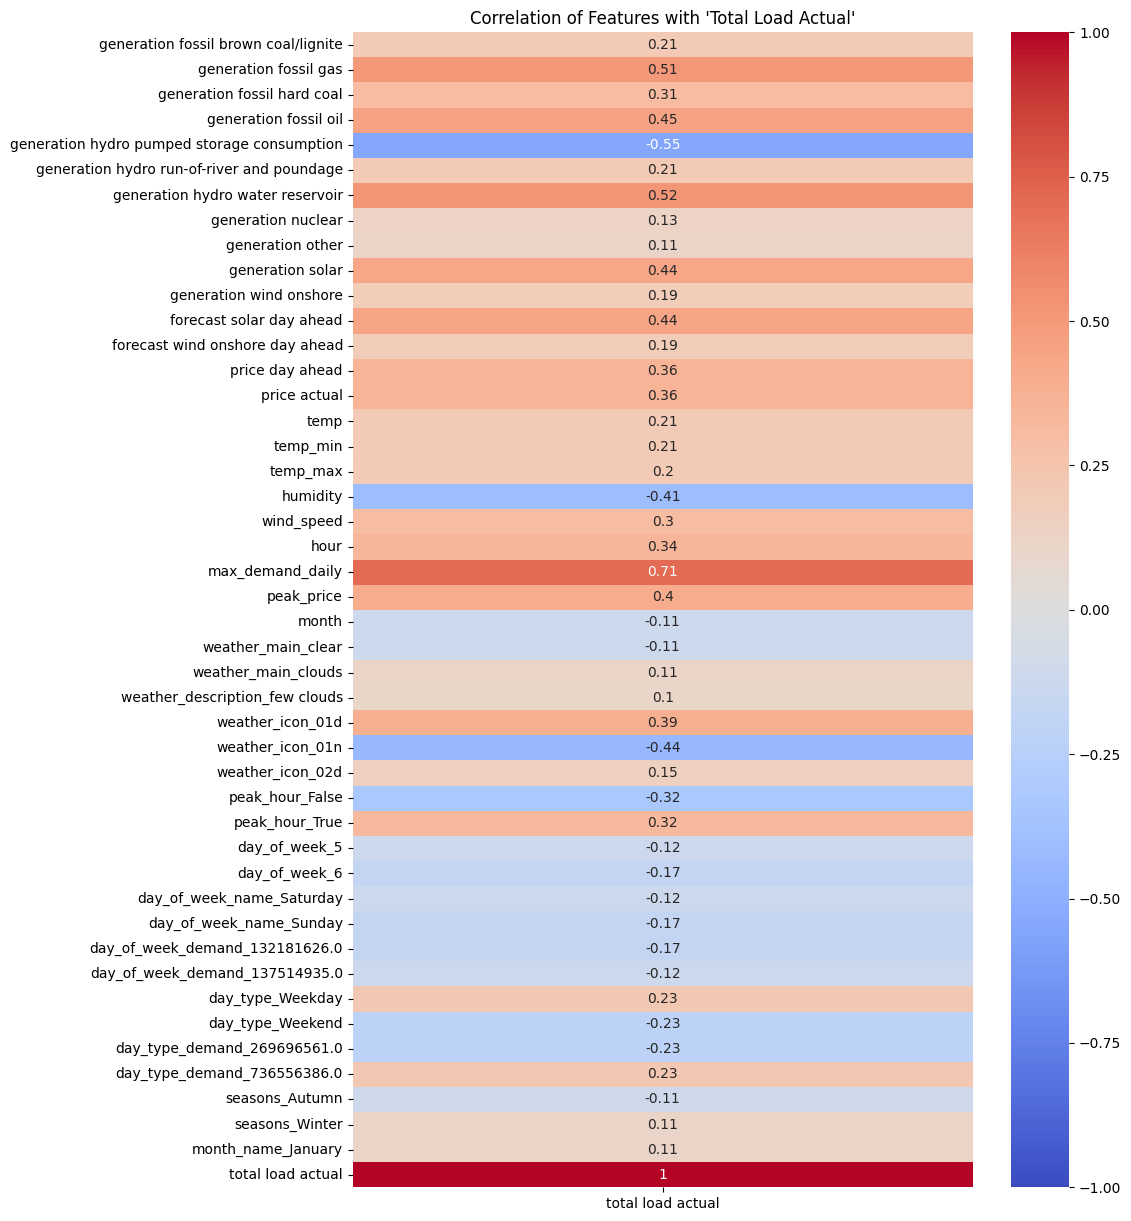

In [ ]:
 import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to consider for correlation
features = [
    'generation fossil brown coal/lignite', 'generation fossil gas',
    'generation fossil hard coal', 'generation fossil oil',
    'generation hydro pumped storage consumption',
    'generation hydro run-of-river and poundage', 'generation hydro water reservoir',
    'generation nuclear', 'generation other', 'generation solar',
    'generation wind onshore', 'forecast solar day ahead',
    'forecast wind onshore day ahead', 'price day ahead', 'price actual',
    'temp', 'temp_min', 'temp_max', 'humidity', 'wind_speed', 'hour',
    'max_demand_daily', 'peak_price', 'month', 'weather_main_clear',
    'weather_main_clouds', 'weather_description_few clouds',
    'weather_icon_01d', 'weather_icon_01n', 'weather_icon_02d',
    'peak_hour_False', 'peak_hour_True', 'day_of_week_5', 'day_of_week_6',
    'day_of_week_name_Saturday', 'day_of_week_name_Sunday',
    'day_of_week_demand_132181626.0', 'day_of_week_demand_137514935.0',
    'day_type_Weekday', 'day_type_Weekend', 'day_type_demand_269696561.0',
    'day_type_demand_736556386.0', 'seasons_Autumn', 'seasons_Winter',
    'month_name_January', 'total load actual'
]

# Ensure 'merged_df' contains all specified features
if not set(features).issubset(encoded_df.copy().columns):
    missing_features = set(features) - set(encoded_df.copy().columns)
    raise ValueError(f"The following features are missing from the DataFrame: {missing_features}")

# Calculate the correlation matrix
correlation_matrix = encoded_df.copy()[features].corr()

# Extract the correlation values for 'total load actual'
correlation_with_total_load_actual = correlation_matrix[['total load actual']]

# Plot the heatmap
plt.figure(figsize=(10, 15))
sns.heatmap(correlation_with_total_load_actual, annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title("Correlation of Features with 'Total Load Actual'")
plt.show()



**From the above correlation matrix of the feature set with the target variable 'total load actual', we can determine the most important features as 'max demand daily', 'generation hydro pumped storage consumption', 'generation hydro water reservoir', 'generation fossil gas'**



**SELECTING IMPORTANT FEATURES WITH A HIGH CORRELATION COEFFICIENT WITH TARGET VARIABLE 'price actual'**

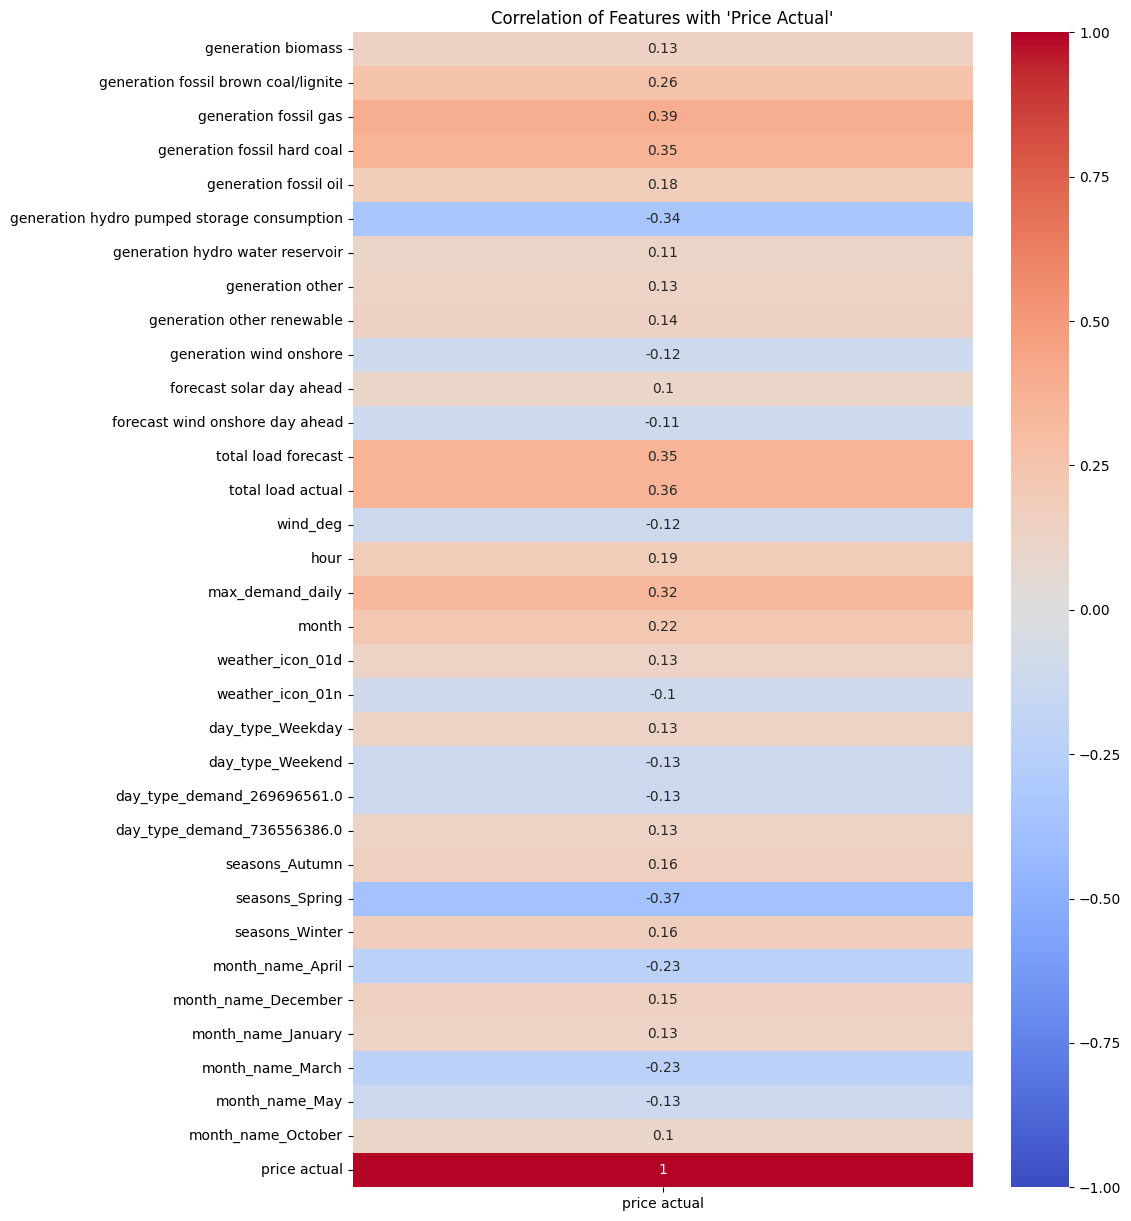

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to consider for correlation along with the target variable 'price actual'
features = [
    'generation biomass', 'generation fossil brown coal/lignite',
    'generation fossil gas', 'generation fossil hard coal',
    'generation fossil oil', 'generation hydro pumped storage consumption',
    'generation hydro water reservoir', 'generation other',
    'generation other renewable', 'generation wind onshore',
    'forecast solar day ahead', 'forecast wind onshore day ahead',
    'total load forecast', 'total load actual', 'wind_deg', 'hour',
    'max_demand_daily', 'month', 'weather_icon_01d', 'weather_icon_01n',
    'day_type_Weekday', 'day_type_Weekend', 'day_type_demand_269696561.0',
    'day_type_demand_736556386.0', 'seasons_Autumn', 'seasons_Spring',
    'seasons_Winter', 'month_name_April', 'month_name_December',
    'month_name_January', 'month_name_March', 'month_name_May',
    'month_name_October', 'price actual'
]

# Ensure 'encoded_df' contains all specified features
if not set(features).issubset(encoded_df.columns):
    missing_features = set(features) - set(encoded_df.columns)
    raise ValueError(f"The following features are missing from the DataFrame: {missing_features}")

# Calculate the correlation matrix
correlation_matrix = encoded_df[features].corr()

# Extract the correlation values for 'price actual'
correlation_with_price_actual = correlation_matrix[['price actual']]

# Plot the heatmap
plt.figure(figsize=(10, 15))
sns.heatmap(correlation_with_price_actual, annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title("Correlation of Features with 'Price Actual'")
plt.show()




**From the above correlation matrix of the feature set with the target variable 'price actual', we can determine the most important features as 'total load forecast', 'total load actual', 'seasons_Spring' and 'generation fossil gas'**